In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Table of contents**<a id='toc0_'></a>    
- 1. [**Performing Facial Recognition with Deep Learning**](#toc1_)    
  - 1.1. [**Project Context**](#toc1_1_)    
  - 1.2. [**Project Objectives**](#toc1_2_)    
  - 1.3. [**Project Dataset Description**](#toc1_3_)    
  - 1.4. [**Project Analysis Steps To Perform**](#toc1_4_)    
    - 1.4.1. [**Preliminary analysis**](#toc1_4_1_)    
      - 1.4.1.1. [**Import Modules and Set Default Environment Variables**](#toc1_4_1_1_)    
      - 1.4.1.2. [**Look for corrupt files [Optional]**   ](#toc1_4_1_2_)    
      - 1.4.1.3. [**Rename Files [Optional]**    ](#toc1_4_1_3_)    
      - 1.4.1.4. [**Plot Sample Images**](#toc1_4_1_4_)    
      - 1.4.1.5. [**Create a validation framework and split the data into train, test, and validation datasets**](#toc1_4_1_5_)    
      - 1.4.1.6. [**Perform necessary transformations to prepare the data for input to the CNN model**](#toc1_4_1_6_)    
      - 1.4.1.7. [**Thing G**](#toc1_4_1_7_)    
      - 1.4.1.8. [**Thing H**](#toc1_4_1_8_)    
      - 1.4.1.9. [**Thing I**](#toc1_4_1_9_)    
      - 1.4.1.10. [**Thing J**](#toc1_4_1_10_)    
      - 1.4.1.11. [**Thing K**](#toc1_4_1_11_)    
      - 1.4.1.12. [**Thing L**](#toc1_4_1_12_)    
    - 1.4.2. [**Part 2**](#toc1_4_2_)    
      - 1.4.2.1. [**Thing A**](#toc1_4_2_1_)    
        - 1.4.2.1.1. [**Thing A.A**](#toc1_4_2_1_1_)    
        - 1.4.2.1.2. [**A.B**](#toc1_4_2_1_2_)    
        - 1.4.2.1.3. [**Thing A.C**](#toc1_4_2_1_3_)    
        - 1.4.2.1.4. [**Thing A.D**](#toc1_4_2_1_4_)    
    - 1.4.3. [**Part 3**](#toc1_4_3_)    
      - 1.4.3.1. [**Thing A**](#toc1_4_3_1_)    
      - 1.4.3.2. [**Thing B**](#toc1_4_3_2_)    
        - 1.4.3.2.1. [**Thing B.A**](#toc1_4_3_2_1_)    
        - 1.4.3.2.2. [**Thing B.A**](#toc1_4_3_2_2_)    
        - 1.4.3.2.3. [**Thing B.C**](#toc1_4_3_2_3_)    
        - 1.4.3.2.4. [**Thing B.D**](#toc1_4_3_2_4_)    
      - 1.4.3.3. [**Thing C**](#toc1_4_3_3_)    
      - 1.4.3.4. [**Thing D**](#toc1_4_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Table of Contents

-----

# 1. <a id='toc1_'></a>[**Performing Facial Recognition with Deep Learning**](#toc0_)

-----------------------------
## 1.1. <a id='toc1_1_'></a>[**Project Context**](#toc0_)
-----------------------------

You are working for Face2Gene, an American AI company that has developed a 
healthcare app for doctors. The app utilizes deep learning algorithms to aid in diagnosing 
patients for genetic disorders and their variants. It converts patient photos into de-identified 
mathematical facial descriptors, which are then compared to syndrome-specific computational-
based classifiers to determine similarity. The app provides a prioritized list of syndromes with 
similar morphology and suggests phenotypic traits and genes for feature annotation and 
syndrome prioritization. 
  
Management has given priority to empowering and entrusting the in-house AI team. As a new 
member of the team, your task is to build a baseline model for facial recognition. The goal is to 
further enhance the app's existing features and add more value to the business based on this 
baseline model.

-----------------------------
## 1.2. <a id='toc1_2_'></a>[**Project Objectives**](#toc0_)
-----------------------------

Create a facial recognition tool using a relevant deep learning algorithm, leveraging 
the provided resources.

-----------------------------
## 1.3. <a id='toc1_3_'></a>[**Project Dataset Description**](#toc0_)
-----------------------------

The ORL Database of Faces consists of 400 images from 40 different subjects. 
The images were captured at different times, under varying lighting conditions, with different 
facial expressions (open, closed eyes, smiling, not smiling), and with or without glasses. All the 
images have a dark homogeneous background, and the subjects are positioned upright and 
frontal with some tolerance for side movement. Each image has a size of 92x112 pixels and 256 
grey levels per pixel. 
  
Data can be downloaded from the following link: 
https://www.kaggle.com/datasets/kasikrit/att-database-of-faces

-----------------------------------
## 1.4. <a id='toc1_4_'></a>[**Project Analysis Steps To Perform**](#toc0_)
-----------------------------------

The following steps will guide you in building the model. 
  
1. Import the relevant packages and collect all the necessary dependencies. 
  
2. Upload and import the data. 
  
3. View a few images to get a sense of the data. 
  
4. Create a validation framework and split the data into train, test, and validation datasets. 
  
5. Perform necessary transformations to prepare the data for input to the CNN model. 
  
6. Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully 
connected layer. You can also consider utilizing state-of-the-art architectures using transfer 
learning. 
  
7. Train the model using the prepared data. 
  
8. Plot the results to evaluate the model's performance. 
  
9. Iterate on the model, making adjustments and improvements, until you achieve an accuracy 
above 90%.



### 1.4.1. <a id='toc1_4_1_'></a>[**Preliminary analysis**](#toc0_)

#### 1.4.1.1. <a id='toc1_4_1_1_'></a>[**Import Modules and Set Default Environment Variables**](#toc0_)

In [ ]:
import gc
import math
import multiprocessing
import os
import time
import uuid
import random
import string
import warnings
from dotenv import load_dotenv
from concurrent.futures import ThreadPoolExecutor

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras import backend as K
from keras.applications import (EfficientNetB0, InceptionV3, MobileNetV2, ResNet50V2, VGG16)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (Callback, EarlyStopping, LambdaCallback, LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau)
from keras.layers import (BatchNormalization, Dense, Dropout, GlobalAveragePooling2D, Input)
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
from keras.utils import Sequence

**Explanations:**

- This code block imports necessary libraries (`pandas`, `numpy`, `matplotlib`, and `seaborn`) and reads the three CSV files into pandas DataFrames. It then displays the first few rows of each dataset to give an initial view of the data.

**Why It Is Important:**

- Importing and examining the datasets is crucial as it allows us to understand the structure and content of our data. This step helps identify any immediate issues with data formatting or missing values and provides a foundation for all subsequent analyses.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.2. <a id='toc1_4_1_2_'></a>[**Look for corrupt files [Optional]**](#toc0_)    [&#8593;](#toc0_)

In [ ]:
def verify_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', '.pgm', '.pnm', '.webp')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {file_path}')
                    os.remove(file_path)
                    print(f'Deleted bad file: {file_path}')

# verify_images(f'{DATASET_PATH}/dataset_test')
# verify_images(f'{DATASET_PATH}/structure_dataset')

**Explanations:**

- This code examines the shape, structure, and quality of each dataset. It checks the number of rows and columns, data types of each column, presence of missing values, and existence of duplicate entries.

**Why It Is Important:**

- Understanding the dataset's structure and quality is crucial for data preprocessing and analysis. It helps identify potential issues like missing data or duplicates that need to be addressed before proceeding with the analysis.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.3. <a id='toc1_4_1_3_'></a>[**Rename Files [Optional]**](#toc0_) [&#8593;](#toc0_)

In [ ]:
def random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for i in range(length))

def rename_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Generate a unique name
            new_name = str(uuid.uuid4())

            # Get the file extension
            file_extension = os.path.splitext(filename)[1]

            # Create the new filename
            new_filename = f"{new_name}.{file_extension}"

            # Full paths
            old_file = os.path.join(root, filename)
            new_file = os.path.join(root, new_filename)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} -> {new_filename}")

# Uncomment if you want to rename all of the files in the dataset
# directories = [f'{DATASET_PATH}/structures_dataset', f'{DATASET_PATH}/dataset_test']
# for start_directory in directories:
#     rename_files(start_directory)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.4. <a id='toc1_4_1_4_'></a>[**Convert File Type [Optional]**](#toc0_) [&#8593;](#toc0_)

In [50]:
def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")

# Usage
# input_dir = 'att_faces_pgm'  # Your current dataset path with PGM files
# output_dir = 'att_faces'  # New dataset path for PNG files
convert_pgm_to_png(input_dir, output_dir)

#### 1.4.1.4. <a id='toc1_4_1_4_'></a>[**Plot Sample Images**](#toc0_) [&#8593;](#toc0_)

In [ ]:
def plot_sample_images(dataset_path, num_samples=1):
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
    fig, axes = plt.subplots(len(classes), num_samples, figsize=(20, 4*len(classes)))

    for i, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))][:num_samples]

        for j, image_name in enumerate(images):
            image_path = os.path.join(class_path, image_name)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

        # Set the class name as the title for the first image in the row
        axes[i, 0].set_title(class_name, fontsize=16, pad=20)

    plt.tight_layout()
    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH', default='/default/dataset/path')
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')

plot_sample_images(f'{DATASET_PATH}/structures_dataset/')

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.5. <a id='toc1_4_1_5_'></a>[**Create a validation framework and split the data into train, test, and validation datasets**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.6. <a id='toc1_4_1_6_'></a>[**Perform necessary transformations to prepare the data for input to the CNN model**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.7. <a id='toc1_4_1_7_'></a>[**Thing G**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.8. <a id='toc1_4_1_8_'></a>[**Thing H**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.9. <a id='toc1_4_1_9_'></a>[**Thing I**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### 1.4.2. <a id='toc1_4_2_'></a>[**Train Model with Augmentation**](#toc0_) [&#8593;](#toc0_)

In [ ]:
# !pip install python-dotenv

In [55]:
import gc
import sys
import glob
import json
import logging
import math
import os
import random
import traceback
import warnings
import yaml
from collections import Counter

from dotenv import load_dotenv

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image
import sklearn
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split

import keras.backend as K
from keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
    RandomTranslation,
    Rescaling
)
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from keras.utils import Sequence
from keras.metrics import Precision, Recall, AUC, Metric
from keras.preprocessing import image

# Import Keras Tuner modules
from keras_tuner import (
    Hyperband, 
    HyperModel, 
    HyperParameters, 
    BayesianOptimization, 
    RandomSearch
)

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision(name='precision')
        self.recall = Recall(name='recall')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update the precision and recall variables
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Compute the F1 score
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        # Reset the state of the metrics
        self.precision.reset_states()
        self.recall.reset_states()

# Define mappings for architectures and preprocessing functions
ARCHITECTURES = {
    'ResNet50V2': ResNet50V2,
    'VGG16': VGG16,
    'InceptionV3': InceptionV3,
    'MobileNetV2': MobileNetV2,
    'EfficientNetB0': EfficientNetB0
}

PREPROCESSING_FUNCTIONS = {
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'efficientnet_preprocess': efficientnet_preprocess
}

# Define metrics mapping
METRICS = {
    'Precision': Precision(name='precision'),
    'Recall': Recall(name='recall'),
    'AUC': AUC(name='auc'),
    'F1Score': F1Score(name='f1_score')
}

class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% validation accuracy. Stopping training.")
            print()
            print("--------------------")
            print()
            self.model.stop_training = True

class CustomValidationCallback(Callback):
    def __init__(self, validation_data, validation_steps):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch, logs=None):
        val_loss = 0
        val_accuracy = 0
        for x, y in self.validation_data.take(self.validation_steps):
            val_metrics = self.model.test_on_batch(x, y)
            val_loss += val_metrics[0]
            val_accuracy += val_metrics[1]

        val_loss /= self.validation_steps
        val_accuracy /= self.validation_steps

        logs['val_loss'] = val_loss
        logs['val_accuracy'] = val_accuracy
        logging.debug(f"\nEpoch {epoch + 1} - Custom validation:")
        logging.debug(f"Loss: {val_loss:.4f}")
        logging.debug(f"Accuracy: {val_accuracy:.4f}")

class DatasetLogger(Callback):
    def __init__(self, train_dataset, val_dataset):
        super().__init__()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset

    def on_epoch_begin(self, epoch, logs=None):
        logging.debug(f"\nEpoch {epoch + 1} - Train samples: {tf.data.experimental.cardinality(self.train_dataset)}")
        logging.debug(f"Epoch {epoch + 1} - Val samples: {tf.data.experimental.cardinality(self.val_dataset)}")

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            logging.debug(f"\nEpoch {epoch + 1} - Train accuracy: {logs.get('accuracy', 'N/A'):.4f}")
            logging.debug(f"Epoch {epoch + 1} - Val accuracy: {logs.get('val_accuracy', 'N/A'):.4f}")

class DebugCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        logging.debug(f"\nStarting epoch {epoch + 1}\n")

    def on_batch_begin(self, batch, logs=None):
        if batch % 100 == 0:
            # logging.debug(f"\nStarting batch {batch}\n")
            pass

    def on_epoch_end(self, epoch, logs=None):
        logging.debug(f"\nEnd of epoch {epoch + 1}\n")
        if logs:
            for key, value in logs.items():
                logging.debug(f"{key}: {value}")
        logging.debug("\n--------------------\n")

class DataGenerator:
    def __init__(self, config):
        logging.debug("DataGenerator initialization starting.")
        self.config = config
        self.batch_size = config['data']['batch_size']
        self.target_size = tuple(config['data']['target_size'])
        
        # Determine preprocessing function
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)
        if use_pretrained_weights:
            self.preprocessing_function = PREPROCESSING_FUNCTIONS[config['data']['preprocessing_function']]
        else:
            # When training from scratch you may choose to use a simple rescaling
            self.preprocessing_function = None  # Or define a custom function
            
        self.augmentation_params = config['augmentation']
        self.pre_split = config['data'].get('pre_split', True)

        logging.debug(f'DG batch_size = {self.batch_size}')
        logging.debug(f'DG target_zie = {self.target_size}')
        logging.debug(f'DG preprocessing_function = {self.preprocessing_function}')
        logging.debug(f'DG augmentation_params = {self.augmentation_params}')
        logging.debug(f'DG pre_split = {self.pre_split}')

        # Create data augmentation and rescaling layers
        self.data_augmentation = self.create_data_augmentation()
        self.rescale_layer = self.create_rescale_layer()

        if self.pre_split:
            logging.debug("DG Calling load_pre_split_data function.")
            self.load_pre_split_data()
        else:
            self.load_and_split_data()

    def load_pre_split_data(self):
        # Paths for pre-split data
        logging.debug("DG LPSD Starting load_pre_split_data function.")
        self.train_path = self.config['data']['train_path']
        logging.debug(f"DG LPSD Train path: {self.train_path}")
        self.test_path = self.config['data']['test_path']
        logging.debug(f"DG LPSD Test path: {self.test_path}")

        # Validate paths
        if not os.path.exists(self.train_path):
            raise FileNotFoundError(f"DG LPSD Training path not found: {self.train_path}")
        if not os.path.exists(self.test_path):
            raise FileNotFoundError(f"DG LPSD Testing path not found: {self.test_path}")

        # Load datasets
        logging.debug("DG LPSD Loading train_dataset datasets")
        self.train_dataset = tf.keras.utils.image_dataset_from_directory(
            self.train_path,
            label_mode='categorical',
            batch_size=None,  # Load as individual samples
            image_size=self.target_size,
            shuffle=True
        )

        logging.debug("DG LPSD Loading test_dataset datasets")  
        self.test_dataset = tf.keras.utils.image_dataset_from_directory(
            self.test_path,
            label_mode='categorical',
            batch_size=None,
            image_size=self.target_size,
            shuffle=False
        )

        train_dataset_unbatched = self.train_dataset
        test_dataset_unbatched = self.test_dataset

        self.class_names = self.train_dataset.class_names

        logging.debug(f"DG LPSD Class names: {self.class_names}")

        # Prepare datasets
        logging.debug("DG LPSD Preparing datasets")
        self.train_dataset = self.prepare_dataset(self.train_dataset, augment=True)
        logging.debug("DG LPSD Train dataset prepared.")
        self.val_dataset = self.prepare_dataset(self.test_dataset, augment=False)
        logging.debug("DG LPSD Val dataset prepared.")
        self.test_dataset = self.val_dataset  # Use the validation dataset for testing if appropriate
        logging.debug("DG LPSD Test dataset prepared.")

        # Compute sample counts
        self.train_sample_count = tf.data.experimental.cardinality(train_dataset_unbatched).numpy()
        self.val_sample_count = tf.data.experimental.cardinality(test_dataset_unbatched).numpy()
        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        
        # Compute class counts directly from the dataset's file paths
        self.class_counts = self.count_samples_from_directories(self.train_path, self.class_names)
        
        print(f'DG LPSD Train path: {self.train_path}')
        print(f'DG LPSD Test path: {self.test_path}')
        print(f'DG LPSD Batch size: {self.batch_size}')
        print(f'DG LPSD Target size: {self.target_size}')
        print(f'DG LPSD steps_per_epoch: {self.steps_per_epoch}')
        print(f'DG LPSD validation_steps: {self.validation_steps}')
        print(f'DG LPSD Preprocessing function: {self.preprocessing_function}')
        print(f'DG LPSD Augmentation params: {self.augmentation_params}')
        print(f'DG LPSD Class counts: {self.class_counts}')
        print(f'DG LPSD Training set size: {self.train_sample_count}')
        print(f'DG LPSD Validation set size: {self.val_sample_count}')
        print(f'DG LPSD Testing set size: {self.val_sample_count}')

    def count_samples_from_directories(self, dataset_path, class_names):
        import os
        counts = {}
        for class_name in class_names:
            class_dir = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_dir):
                counts[class_name] = len([
                    fname for fname in os.listdir(class_dir)
                    if os.path.isfile(os.path.join(class_dir, fname))
                ])
            else:
                counts[class_name] = 0
        return counts

    def load_and_split_data(self):
        logging.debug("DG LASD Getting Class Names.")
        self.class_names = [
            d for d in sorted(os.listdir(self.config['data']['dataset_path']))
            if os.path.isdir(os.path.join(self.config['data']['dataset_path'], d))
        ]
        logging.debug(f"DG LASD Class Names: {self.class_names}")
        class_indices = {name: index for index, name in enumerate(self.class_names)}
        logging.debug(f"DG LASD Class Indices: {class_indices}")

        # Collect file paths and labels
        file_paths = []
        labels = []
        for class_name in self.class_names:
            class_dir = os.path.join(self.config['data']['dataset_path'], class_name)
            class_files = glob.glob(os.path.join(class_dir, '*'))
            file_paths.extend(class_files)
            labels.extend([class_indices[class_name]] * len(class_files))

        file_paths = np.array(file_paths)
        labels = np.array(labels)

        # First split: train and temp (val + test)
        logging.debug("DG LASD Splitting data into train and temp sets.")
        train_paths, temp_paths, train_labels, temp_labels = train_test_split(
            file_paths, labels,
            test_size=0.3,
            stratify=labels,
            random_state=42
        )

        # Second split: validation and test
        logging.debug("DG LASD Splitting temp data into val and test sets.")
        val_paths, test_paths, val_labels, test_labels = train_test_split(
            temp_paths, temp_labels,
            test_size=0.5,
            stratify=temp_labels,
            random_state=42
        )

        # Mapping indices back to class names for readability
        index_to_class = {index: name for name, index in class_indices.items()}

        # Training set class distribution
        train_class_counts = Counter(train_labels)
        train_class_counts_named = {index_to_class[k]: v for k, v in train_class_counts.items()}
        logging.info(f"Training class distribution: {train_class_counts_named}")

        # Validation set class distribution
        val_class_counts = Counter(val_labels)
        val_class_counts_named = {index_to_class[k]: v for k, v in val_class_counts.items()}
        logging.info(f"Validation class distribution: {val_class_counts_named}")

        # Test set class distribution
        test_class_counts = Counter(test_labels)
        test_class_counts_named = {index_to_class[k]: v for k, v in test_class_counts.items()}
        logging.info(f"Test class distribution: {test_class_counts_named}")

        # Store the training class counts as an attribute
        self.class_counts = train_class_counts_named

        # Create datasets from file paths and labels
        logging.debug("DG LASD Creating datasets from file paths and labels.")
        train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
        val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
        test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

        # Define the load_image function inside the method
        def load_image(file_path, label):
            # Read the image from file
            image = tf.io.read_file(file_path)
            # Decode the image data (supports JPEG, PNG, BMP, and GIF)
            image = tf.image.decode_image(image, channels=3)
            # Set static shape if possible
            image.set_shape([None, None, 3])
            # Convert image to float32 and resize
            image = tf.image.convert_image_dtype(image, tf.float32)
            # Resize image to target size
            image = tf.image.resize(image, self.target_size)
            # Apply preprocessing function if specified
            if self.preprocessing_function:
                image = self.preprocessing_function(image)
            else: 
                # Default normalization if no preprocessing function is specified
                image = image / 255.0
            
            # One-hot encode the label
            label = tf.one_hot(label, depth=len(self.class_names))
            return image, label

        # Map function to load images from file paths
        logging.debug("DG LASD Mapping load_image function to datasets.")
        train_dataset = train_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        val_dataset = val_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        test_dataset = test_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

        # Prepare datasets
        logging.debug("DG LASD Preparing datasets.")
        self.train_dataset = self.prepare_dataset(train_dataset, augment=True)
        self.val_dataset = self.prepare_dataset(val_dataset, augment=False)
        self.test_dataset = self.prepare_dataset(test_dataset, augment=False)

        # Compute sample counts
        logging.debug("DG LASD Computing sample counts.")
        self.train_sample_count = len(train_paths)
        self.val_sample_count = len(val_paths)
        self.test_sample_count = len(test_paths)
        print(f"DG LASD Training sample size: {self.train_sample_count}")
        print(f"DG LASD Validation sample size: {self.val_sample_count}")
        print(f"DG LASD Test sample size: {self.test_sample_count}")

        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        self.test_steps = math.ceil(self.test_sample_count / self.batch_size)
        print(f"DG LASD Steps per epoch: {self.steps_per_epoch}")
        print(f"DG LASD Validation steps: {self.validation_steps}")
        print(f"DG LASD Test steps: {self.test_steps}")

    def split_dataset(self):
        # Calculate dataset size
        dataset_size = tf.data.experimental.cardinality(self.dataset).numpy()

        # Define split sizes
        train_size = int(0.7 * dataset_size)
        val_size = int(0.15 * dataset_size)
        test_size = dataset_size - train_size - val_size

        # Shuffle and split
        self.dataset = self.dataset.shuffle(buffer_size=dataset_size, seed=42)
        train_dataset = self.dataset.take(train_size)
        val_test_dataset = self.dataset.skip(train_size)
        val_dataset = val_test_dataset.take(val_size)
        test_dataset = val_test_dataset.skip(val_size)

        logging.debug(f"DG SD Dataset size: {dataset_size}")
        logging.debug(f"DG SD Training size: {train_size}")
        logging.debug(f"DG SD Validation size: {val_size}")
        logging.debug(f"DG SD Test size: {test_size}")

        return train_dataset, val_dataset, test_dataset

    def prepare_dataset(self, dataset, augment):
        if augment:
            try:
                dataset = dataset.map(self.augment, num_parallel_calls=tf.data.AUTOTUNE)
                dataset = dataset.shuffle(1000).repeat()
            except Exception as e:
                logging.error(f"An error occurred trying to prepare dataset with augment true: {e}")
                logging.debug(traceback.format_exc())
        else:
            dataset = dataset.map(self.normalize_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            dataset = dataset.cache()
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)
        return dataset

    def get_dataset_size(self, dataset):
        return tf.data.experimental.cardinality(dataset).numpy() * self.batch_size

    def create_data_augmentation(self):
        layers = []
        augmentation_params = self.augmentation_params

        # Apply augmentations based on parameters
        if augmentation_params.get('rotation_range'):
            rotation_range = augmentation_params['rotation_range']
            factor = rotation_range / 360.0  # Convert degrees to fraction of full circle
            # Ensure factor is within [-1.0, 1.0]
            factor = max(min(factor, 1.0), -1.0)
            layers.append(RandomRotation(factor=(-factor, factor)))

        if augmentation_params.get('horizontal_flip'):
            layers.append(RandomFlip(mode='horizontal'))

        if augmentation_params.get('vertical_flip'):
            layers.append(RandomFlip(mode='vertical'))

        if augmentation_params.get('zoom_range'):
            zoom = augmentation_params['zoom_range']
            # RandomZoom expects height_factor and width_factor in [-1.0, 1.0]
            # Ensure zoom is within [0.0, 1.0] to avoid invalid factors
            zoom = max(min(zoom, 1.0), 0.0)
            layers.append(RandomZoom(height_factor=(-zoom, zoom), width_factor=(-zoom, zoom)))

        if augmentation_params.get('width_shift_range') or augmentation_params.get('height_shift_range'):
            width_shift = augmentation_params.get('width_shift_range', 0.0)
            height_shift = augmentation_params.get('height_shift_range', 0.0)
            # RandomTranslation expects height_factor and width_factor in [-1.0, 1.0]
            width_shift = max(min(width_shift, 1.0), -1.0)
            height_shift = max(min(height_shift, 1.0), -1.0)
            layers.append(RandomTranslation(height_factor=height_shift, width_factor=width_shift))

        if augmentation_params.get('brightness_range'):
            brightness = augmentation_params['brightness_range']
            # RandomBrightness expects factor in [0.0, inf), but to avoid extreme brightness, cap it
            brightness = max(brightness, 0.0)
            layers.append(RandomBrightness(factor=brightness))

        if augmentation_params.get('contrast_range'):
            contrast = augmentation_params['contrast_range']
            # RandomContrast expects factor in [0.0, inf), but to avoid extreme contrast, cap it
            contrast = max(contrast, 0.0)
            layers.append(RandomContrast(factor=contrast))
            
        if not layers:
            layers.append(tf.keras.layers.Lambda(lambda x: x))

        data_augmentation = tf.keras.Sequential(layers)
        return data_augmentation

    def create_rescale_layer(self):
        # Define which preprocessing functions expect which input ranges
        preprocess_0_255 = [resnet_preprocess, vgg_preprocess]
        preprocess_0_1 = [efficientnet_preprocess]
        preprocess_minus1_1 = [mobilenet_preprocess, inception_preprocess]

        if self.preprocessing_function in preprocess_0_255:
            # No rescaling needed; images are already in [0, 255]
            return None
        elif self.preprocessing_function in preprocess_0_1:
            # Rescaling needed to bring images to [0, 1]
            return Rescaling(1./255)
        elif self.preprocessing_function in preprocess_minus1_1:
            # Rescaling needed to bring images to [0, 1]; preprocessing function will scale to [-1, 1]
            return Rescaling(1./255)
        else:
            # Default to rescaling to [0, 1]
            return Rescaling(1./255)

    def augment(self, images, labels):
        # Different preprocessing functions expect different ranges of images after augmentation
        # ResNet50V2 and VGG16: Expect images in the range [0, 255] with mean subtraction.
        # InceptionV3 and MobileNetV2: Expect images scaled to [-1, 1].
        # EfficientNetB0: Expects images scaled to [0, 1].
        
        images = tf.cast(images, tf.float32)

        # Apply rescaling if necessary
        if self.rescale_layer:
            images = self.rescale_layer(images)

        # Apply data augmentation
        images = self.data_augmentation(images)

        # Apply preprocessing function
        images = self.preprocessing_function(images)

        return images, labels

    def normalize_and_preprocess(self, images, labels):
        images = tf.cast(images, tf.float32)

        # Apply rescaling if necessary
        if self.rescale_layer:
            images = self.rescale_layer(images)

        # Apply preprocessing function
        images = self.preprocessing_function(images)

        return images, labels

    def create_datasets(self):
        return None

class MyHyperModel(HyperModel):
    def __init__(self, config, num_classes, best_hyperparameters=None):
        """
        Initializes the HyperModel.

        Args:
            config (dict): Configuration dictionary.
            num_classes (int): Number of output classes.
            best_hyperparameters (HyperParameters, optional): Best hyperparameters from tuning.
        """
        self.config = config
        self.num_classes = num_classes
        self.best_hyperparameters = best_hyperparameters

    def build(self, hp):
        """
        Builds the model based on whether to use pre-trained weights or not.

        Args:
            hp (HyperParameters): Hyperparameters for tuning.

        Returns:
            keras.Model: Compiled Keras model.
        """
        # If hp is None, use best_hyperparameters or default fixed hyperparameters
        if hp is None:
            if self.best_hyperparameters is not None:
                hp = self.best_hyperparameters
            else:
                # Create a default HyperParameters object with fixed values from config
                from keras_tuner import HyperParameters
                hp = HyperParameters()
                
                # Pre-trained model hyperparameters
                hp.Fixed('dense_units', self.config['hyperparameters']['pretrained_model']['dense_units']['default'])
                hp.Fixed('dropout_rate', self.config['hyperparameters']['pretrained_model']['dropout_rate']['default'])
                hp.Fixed('learning_rate', self.config['hyperparameters']['pretrained_model']['learning_rate']['default'])
                hp.Fixed('optimizer', self.config['hyperparameters']['pretrained_model']['optimizer']['default'])
                
                # Scratch model hyperparameters
                hp.Fixed('dense_units_scratch', self.config['hyperparameters']['scratch_model']['dense_units_scratch']['default'])
                hp.Fixed('dropout_rate_scratch', self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['default'])
                hp.Fixed('learning_rate_scratch', self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['default'])
                hp.Fixed('optimizer_scratch', self.config['hyperparameters']['scratch_model']['optimizer_scratch']['default'])

        model_config = self.config['model']
        use_pretrained_weights = model_config.get('use_pretrained_weights', True)

        if use_pretrained_weights:
            # **Using Pre-trained Architecture**
            architecture_name = model_config['name']
            architecture = ARCHITECTURES[architecture_name]
            input_shape = tuple(model_config['input_shape'])
            base_model_weights = 'imagenet' if use_pretrained_weights else None
            
            print(f"Building model with pre-trained model {architecture_name} with input shape {input_shape} and base model weights {base_model_weights}")
            print()

            # Load the base model with or without pre-trained weights
            base_model = architecture(
                weights=base_model_weights,
                include_top=False,
                input_shape=input_shape,
                name='base_model'  # Assign a name for easy access
            )

            # Freeze the base model initially
            base_model.trainable = False

            # Create the classification head
            inputs = Input(shape=input_shape)
            x = base_model(inputs, training=False)
            x = Flatten()(x)

            # Integrate hyperparameters for dense units and dropout rate
            dense_units = hp.Int(
                'dense_units',
                min_value=self.config['hyperparameters']['pretrained_model']['dense_units']['min'],
                max_value=self.config['hyperparameters']['pretrained_model']['dense_units']['max'],
                step=self.config['hyperparameters']['pretrained_model']['dense_units']['step'],
                default=self.config['hyperparameters']['pretrained_model']['dense_units']['default']
            )
            dropout_rate = hp.Float(
                'dropout_rate',
                min_value=self.config['hyperparameters']['pretrained_model']['dropout_rate']['min'],
                max_value=self.config['hyperparameters']['pretrained_model']['dropout_rate']['max'],
                step=self.config['hyperparameters']['pretrained_model']['dropout_rate']['step'],
                default=self.config['hyperparameters']['pretrained_model']['dropout_rate']['default']
            )

            x = Dense(dense_units, activation='relu')(x)
            x = Dropout(dropout_rate)(x)
            x = Dense(dense_units // 2, activation='relu')(x)
            x = Dropout(dropout_rate)(x)
            output = Dense(self.num_classes, activation='softmax')(x)

            model = Model(inputs=inputs, outputs=output)

            # Compile the model with hyperparameter-defined optimizer
            learning_rate = hp.Float(
                'learning_rate',
                min_value=self.config['hyperparameters']['pretrained_model']['learning_rate']['min'],
                max_value=self.config['hyperparameters']['pretrained_model']['learning_rate']['max'],
                sampling='log',
                default=self.config['hyperparameters']['pretrained_model']['learning_rate']['default']
            )
            optimizer_choice = hp.Choice(
                'optimizer',
                values=self.config['hyperparameters']['pretrained_model']['optimizer']['choices'],
                default=self.config['hyperparameters']['pretrained_model']['optimizer']['default']
            )

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=learning_rate)
            else:
                optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

            metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics']]

            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=metrics
            )

            return model

        else:
            # **Building Custom Model from Scratch**
            print("Building model from scratch.")
            print()
            # Define a Sequential model similar to build_model function
            model = Sequential()
            model.add(Input(shape=tuple(self.config['model']['input_shape'])))

            # Hyperparameters for Conv2D layers
            for i in range(1, 4):  # Assuming 3 Conv2D layers
                filters = hp.Int(
                    f'conv_{i}_filters_scratch',
                    min_value=32,
                    max_value=256,
                    step=32,
                    default=64
                )
                kernel_size = hp.Choice(
                    f'conv_{i}_kernel_size_scratch',
                    values=[3, 5],
                    default=3
                )
                model.add(Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation='relu'))
                model.add(MaxPooling2D((2, 2)))

            model.add(Flatten())

            # Hyperparameters for Dense layers
            dense_units = hp.Int(
                'dense_units_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['max'],
                step=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['step'],
                default=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['default']
            )
            dropout_rate = hp.Float(
                'dropout_rate_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['max'],
                step=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['step'],
                default=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['default']
            )

            model.add(Dense(dense_units, activation='relu'))
            model.add(Dropout(dropout_rate))
            model.add(Dense(dense_units // 2, activation='relu'))
            model.add(Dropout(dropout_rate))
            model.add(Dense(self.num_classes, activation='softmax'))

            # Compile the model with hyperparameter-defined optimizer
            learning_rate = hp.Float(
                'learning_rate_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['max'],
                sampling='log',
                default=self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['default']
            )
            optimizer_choice = hp.Choice(
                'optimizer_scratch',
                values=self.config['hyperparameters']['scratch_model']['optimizer_scratch']['choices'],
                default=self.config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
            )

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=learning_rate)
            else:
                optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

            metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics']]

            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=metrics
            )

            return model

def configure_logger(log_level=logging.DEBUG):
    """Configures the logger with the given log level."""
    # Clear any existing TensorFlow session
    tf.keras.backend.clear_session()
    # To ignore warnings
    warnings.filterwarnings("ignore")
    logger = logging.getLogger()
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(log_level)
        formatter = logging.Formatter('%(levelname)s:%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(log_level)
    return logger

def setup_random_seed(seed=42):
    """Configures random seed for reproducibility."""
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.config.experimental.enable_op_determinism()

def print_system_info():
    """Prints version info of the system and key libraries."""
    print(f"Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
    print(f"TensorFlow: {tf.__version__}")
    print(f"Keras: {tf.keras.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    print(f'GPUs: {gpus if gpus else "None"}')
    print()

def setup_gpu(gpu_config):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Log the number of GPUs available
            logging.debug(f"GPU setup complete. Found {len(gpus)} GPU(s).")

            # Optionally, you can log more details about each GPU
            for i, gpu in enumerate(gpus):
                logging.debug(f"GPU {i}: {gpu}")

        except RuntimeError as e:
            logging.error(f"GPU setup failed: {e}")
    else:
        logging.warning("No GPUs found. The model will run on CPU.")

def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

def setup_datasets(config):
    try:
        data_generator = DataGenerator(config)
        logging.debug("DataGenerator initialized successfully.")
        train_dataset, test_dataset, steps_per_epoch, validation_steps = data_generator.get_data_generators()
        class_names = data_generator.class_names  # Use class names from data generator
        logging.debug(f"Class names: {class_names}")

        return train_dataset, test_dataset, steps_per_epoch, validation_steps, class_names
    except Exception as e:
        logging.error(f"Dataset setup failed: {e}")
        raise

def get_callbacks(config, train_dataset, test_dataset, validation_steps, for_tuning=False):
    """
    Returns a list of callbacks based on the configuration.

    Args:
        config (dict): Configuration dictionary.
        train_dataset (tf.data.Dataset): Training dataset.
        test_dataset (tf.data.Dataset): Testing dataset.
        validation_steps (int): Number of validation steps.
        for_tuning (bool): Flag indicating if it's for hyperparameter tuning.

    Returns:
        list: List of Keras callbacks.
    """
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=config['training']['patience'],
            restore_best_weights=True
        ),
        ModelCheckpoint(
            filepath=config['training']['model_checkpoint_path'],
            save_best_only=True
        )
    ]
    
    # Incorporate ReduceLROnPlateau if specified in config
    reduce_lr_config = config.get('reduce_lr_on_plateau', None)
    if reduce_lr_config:
        reduce_lr = ReduceLROnPlateau(
            monitor=reduce_lr_config.get('monitor', 'val_loss'),
            factor=reduce_lr_config.get('factor', 0.5),
            patience=reduce_lr_config.get('patience', 5),
            min_lr=reduce_lr_config.get('min_lr', 1e-6),
            verbose=reduce_lr_config.get('verbose', 1)
        )
        callbacks.append(reduce_lr)
    
    if not for_tuning:
        # Include custom callbacks only when not tuning
        callbacks.extend([
            AccuracyCallback(target_accuracy=config['training']['target_accuracy']),
            CustomValidationCallback(test_dataset, validation_steps),
            DebugCallback(),
            DatasetLogger(train_dataset, test_dataset)
        ])
    
    return callbacks

def compute_class_weights_from_counts(class_counts, class_names):
    total_samples = sum(class_counts.values())
    class_weight_dict = {}
    for idx, class_name in enumerate(class_names):
        count = class_counts.get(class_name, 0)
        if count > 0:
            class_weight_dict[idx] = total_samples / (len(class_counts) * count)
        else:
            class_weight_dict[idx] = 0.0  # Handle classes with zero samples
    return class_weight_dict

def save_best_hyperparameters(best_hps, filepath='best_hyperparameters.json'):
    with open(filepath, 'w') as f:
        json.dump(best_hps.values, f)

def load_best_hyperparameters(filepath='best_hyperparameters.json'):
    """
    Loads the best hyperparameters from a JSON file and logs them.

    Args:
        filepath (str): Path to the JSON file containing the best hyperparameters.

    Returns:
        HyperParameters: A Keras Tuner HyperParameters object with the loaded values.
    """
    # Load the hyperparameters from the JSON file
    with open(filepath, 'r') as f:
        hps_dict = json.load(f)
    
    # Log or print the loaded hyperparameters
    print(f"Loaded hyperparameters from {filepath}:")
    for key, value in hps_dict.items():
        print(f"  {key}: {value}")
    
    # Create a HyperParameters object
    hp = HyperParameters()
    
    # Set the hyperparameters from the loaded JSON
    for key, value in hps_dict.items():
        hp.Fixed(key, value)
    
    return hp

def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")

def main(config_path):
    """
    The main function to orchestrate data loading, model building, training, and evaluation.

    Args:
        config_path (str): Path to the configuration YAML file.
    """
    logger = configure_logger()

    setup_random_seed()
    print_system_info()
    
    # Load the configuration
    config = load_config(config_path)
    logging.debug(f"Loaded configuration: {config}")
    performance_tuning = config.get('tuning', {}).get('perform_tuning', True)
    logging.debug(f"Perform tuning: {performance_tuning}")

    # Set up GPU if available
    setup_gpu(config.get('gpu', {}))
    logging.debug("Completed GPU setup.")

    # Load environment variables
    try:
        from google.colab import drive
        # drive.mount('/content/drive')
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
        logging.debug("Running in Colab environment")
    except ImportError:
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
        logging.debug("Running in local environment")

    # Update the dataset paths based on whether the data is pre-split or not
    pre_split = config['data'].get('pre_split', True)
    if pre_split:
        # For pre-split data
        train_path = os.path.join(DATASET_PATH, config['data']['train_dir'])
        test_path = os.path.join(DATASET_PATH, config['data']['test_dir'])
        config['data']['train_path'] = train_path
        config['data']['test_path'] = test_path
        logging.debug(f"Train path: {train_path}")
        logging.debug(f"Test path: {test_path}")
    else:
        # For single directory data
        dataset_path = os.path.join(DATASET_PATH, config['data']['dataset_dir'])
        config['data']['dataset_path'] = dataset_path
        logging.debug(f"Dataset path: {dataset_path}")

    try:
        # Initialize DataGenerator
        data_generator = DataGenerator(config)
        logging.debug("DataGenerator initialized successfully.")
        train_dataset = data_generator.train_dataset
        val_dataset = data_generator.val_dataset
        test_dataset = data_generator.test_dataset
        class_names = data_generator.class_names
        logging.debug(f"Class names: {class_names}")
        steps_per_epoch = data_generator.steps_per_epoch
        validation_steps = data_generator.validation_steps

        num_classes = len(class_names)

        # Compute class weights using training data
        logging.debug("Main Function Counting Classes and Computing Weights")
        class_counts = data_generator.class_counts
        logging.debug(f"Class counts: {class_counts}")
        class_weight_dict = compute_class_weights_from_counts(class_counts, class_names)
        logging.debug(f"Computed class weights: {class_weight_dict}")

        # Retrieve training parameters
        initial_epochs = config['training'].get('initial_epochs', 10)
        fine_tune_epochs = config['training'].get('fine_tune_epochs', 0)
        total_epochs = initial_epochs + fine_tune_epochs

        # Check if using pre-trained weights
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)

        if performance_tuning:
            # Instantiate the hypermodel
            hypermodel = MyHyperModel(config, num_classes)
            logging.debug("HyperModel instantiated successfully.")

            # Get callbacks for tuning (only deepcopyable ones)
            tuning_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=True)

            # Set up the tuner
            tuner = RandomSearch(
                hypermodel,
                objective='val_accuracy',
                max_trials=config['tuner']['max_trials'],
                executions_per_trial=config['tuner']['executions_per_trial'],
                directory='hyperparameter_tuning',
                project_name='keras_tuner_project'
            )
            logging.debug("Keras Tuner initialized successfully.")

            # Run the hyperparameter search
            tuner.search(
                train_dataset,
                epochs=initial_epochs,
                validation_data=val_dataset,
                callbacks=tuning_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            # Get the optimal hyperparameters
            best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

            logging.debug(f"""
            The hyperparameter search is complete.
            Best learning rate: {best_hps.get('learning_rate')}
            Best dense units: {best_hps.get('dense_units')}
            Best dropout rate: {best_hps.get('dropout_rate')}
            Best optimizer: {best_hps.get('optimizer')}
            """)
            
            save_best_hyperparameters(best_hps)
            logging.debug("Best hyperparameters saved to file.")

            # Build the best model
            model = tuner.hypermodel.build(best_hps)
            logging.debug("Best model built with optimal hyperparameters.")
        else:
            # Load the best hyperparameters from file
            best_hps = load_best_hyperparameters()
            logging.debug("Loaded best hyperparameters from file.")

            if best_hps is None:
                logging.error("Best hyperparameters could not be loaded. Ensure they are saved correctly.")
                raise ValueError("Best hyperparameters are not available.")

            # Instantiate the hypermodel with best hyperparameters
            hypermodel = MyHyperModel(config, num_classes, best_hyperparameters=best_hps)
            model = hypermodel.build(hp=None)  # hp is None, so it uses best_hyperparameters
            print(f"Model built with loaded hyperparameters: {best_hps}")

        # Get all callbacks including custom ones for final training
        final_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=False)

        # **Initial Training Phase**
        history = model.fit(
            train_dataset,
            epochs=initial_epochs,
            validation_data=val_dataset,
            callbacks=final_callbacks,
            class_weight=class_weight_dict,
            steps_per_epoch=steps_per_epoch
        )

        logging.debug("Initial training completed.")

        # **Fine-Tuning Phase**
        if use_pretrained_weights and fine_tune_epochs > 0:
            logging.debug("Starting fine-tuning phase.")

            # Unfreeze the base model
            # Ensure that the base model was named 'base_model' in MyHyperModel
            try:
                base_model = model.get_layer('base_model')
            except ValueError:
                # If not found, iterate through layers to find the base model
                base_model = None
                for layer in model.layers:
                    if isinstance(layer, Model):
                        base_model = layer
                        break
                if base_model is None:
                    raise ValueError("Base model layer not found for fine-tuning.")

            base_model.trainable = True

            # Recompile the model with a lower learning rate
            if use_pretrained_weights:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['pretrained_model']['optimizer']['default']
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate', 1e-5))
            else:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate_scratch', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate_scratch', 1e-5))

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=fine_tune_learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=fine_tune_learning_rate)
            else:
                optimizer = Adam(learning_rate=fine_tune_learning_rate)  # Default to Adam

            # Recompile the model
            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]
            )

            logging.debug("Model recompiled for fine-tuning.")

            # Continue training
            history_fine = model.fit(
                train_dataset,
                epochs=total_epochs,
                initial_epoch=initial_epochs,
                validation_data=val_dataset,
                callbacks=final_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            logging.debug("Fine-tuning completed.")

        # Evaluate the model
        logging.debug("Final evaluation:")
        final_evaluation = model.evaluate(test_dataset)
        logging.debug(f"Final evaluation metrics: {final_evaluation}")

        # Save the trained model
        model.save('final_model.h5')
        logging.debug("Model saved successfully.")

        return history, model, class_names, config['data']['target_size'], config['data']['preprocessing_function'], config['model']['name']

    except Exception as e:
        logging.error(f"An error occurred: {e}")
        logging.debug(traceback.format_exc())

        return None, None, None, None, None, None



Python: 3.12.6
TensorFlow: 2.17.0
Keras: 3.5.0
Scikit-learn: 1.5.2
GPUs: None



In [57]:
history, model, class_names, target_size, preprocessing_function, ptm_name = main('config.yaml')

DEBUG:Loaded configuration: {'model': {'name': 'ResNet50V2', 'use_pretrained_weights': True, 'input_shape': [128, 128, 3], 'dense_units': 512, 'dropout_rate': 0.5, 'initial_learning_rate': 0.001, 'decay_steps': 100, 'decay_rate': 0.96, 'additional_metrics': ['Precision', 'Recall', 'AUC', 'F1Score'], 'fine_tune_learning_rate': '1e-5', 'pretrained_model_eval': True}, 'augmentation': {'enabled': True, 'rotation_range': 5, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False, 'zoom_range': 0.2, 'brightness_range': 0.8}, 'data': {'pre_split': True, 'dataset_dir': 'att_faces', 'train_dir': 'train_dataset', 'test_dir': 'test_dataset', 'validation_dir': 'validation_dataset', 'batch_size': 32, 'target_size': [128, 128], 'preprocessing_function': 'resnet_preprocess'}, 'tuning': {'perform_tuning': False, 'max_trials': 5, 'executions_per_trial': 1}, 'training': {'initial_epochs': 25, 'fine_tune_epochs': 0, 'patience': 5, 'target_accuracy': 0.99, 'fin

Found 10235 files belonging to 10 classes.


DEBUG:DG LPSD Loading test_dataset datasets


Found 1474 files belonging to 10 classes.


DEBUG:DG LPSD Class names: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
DEBUG:DG LPSD Preparing datasets
DEBUG:DG LPSD Train dataset prepared.
DEBUG:DG LPSD Val dataset prepared.
DEBUG:DG LPSD Test dataset prepared.
DEBUG:DataGenerator initialized successfully.
DEBUG:Class names: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
DEBUG:Main Function Counting Classes and Computing Weights
DEBUG:Class counts: {'altar': 829, 'apse': 514, 'bell_tower': 1059, 'column': 1919, 'dome(inner)': 616, 'dome(outer)': 1177, 'flying_buttress': 407, 'gargoyle': 1571, 'stained_glass': 1033, 'vault': 1110}
DEBUG:Computed class weights: {0: 1.2346200241254524, 1: 1.9912451361867705, 2: 0.9664778092540132, 3: 0.5333507034914018, 4: 1.661525974025974, 5: 0.8695836873406967, 6: 2.5147420147420148, 7: 0.6514958625079568, 8: 0.9908034849951597, 9: 0.

DG LPSD Train path: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/train_dataset
DG LPSD Test path: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/test_dataset
DG LPSD Batch size: 32
DG LPSD Target size: (128, 128)
DG LPSD steps_per_epoch: 320
DG LPSD validation_steps: 47
DG LPSD Preprocessing function: <function preprocess_input at 0x16cda0b80>
DG LPSD Augmentation params: {'enabled': True, 'rotation_range': 5, 'width_shift_range': 0.1, 'height_shift_range': 0.1, 'horizontal_flip': True, 'vertical_flip': False, 'zoom_range': 0.2, 'brightness_range': 0.8}
DG LPSD Class counts: {'altar': 829, 'apse': 514, 'bell_tower': 1059, 'column': 1919, 'dome(inner)': 616, 'dome(outer)': 1177, 'flying_buttress': 407, 'gargoyle': 1571, 'stained_glass': 1033, 'vault': 1110}
DG LPSD Training set size: 10235
DG LPSD Validation set size: 1474
DG LPSD Testing set size: 1474
Loaded hyperparameters from best_hyperparameters.json:


DEBUG:
Starting epoch 1

DEBUG:
Epoch 1 - Train samples: -1
DEBUG:Epoch 1 - Val samples: 47


Model built with loaded hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x84d823f50>
Epoch 1/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.3084 - auc: 0.7110 - f1_score: 0.2298 - loss: 2.3469 - precision: 0.4803 - recall: 0.1516

DEBUG:
Epoch 1 - Custom validation:
DEBUG:Loss: 0.7372
DEBUG:Accuracy: 0.7538
DEBUG:
End of epoch 1

DEBUG:accuracy: 0.44121092557907104
DEBUG:auc: 0.8193408250808716
DEBUG:f1_score: 0.38311684131622314
DEBUG:loss: 1.809399962425232
DEBUG:precision: 0.6909368634223938
DEBUG:recall: 0.2650390565395355
DEBUG:val_accuracy: 0.7537531649812739
DEBUG:val_auc: 0.9700973629951477
DEBUG:val_f1_score: 0.7487646341323853
DEBUG:val_loss: 0.737169216287897
DEBUG:val_precision: 0.8513396978378296
DEBUG:val_recall: 0.6682496666908264
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 1 - Train accuracy: 0.4412
DEBUG:Epoch 1 - Val accuracy: 0.7538


320/320 ━━━━━━━━━━━━━━━━━━━━ 172s 523ms/step - accuracy: 0.3088 - auc: 0.7114 - f1_score: 0.2303 - loss: 2.3453 - precision: 0.4809 - recall: 0.1519 - val_accuracy: 0.7538 - val_auc: 0.9701 - val_f1_score: 0.7488 - val_loss: 0.7372 - val_precision: 0.8513 - val_recall: 0.6682 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 2

DEBUG:
Epoch 2 - Train samples: -1
DEBUG:Epoch 2 - Val samples: 47


Epoch 2/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6748 - auc: 0.9391 - f1_score: 0.6509 - loss: 1.0679 - precision: 0.8413 - recall: 0.5312

DEBUG:
Epoch 2 - Custom validation:
DEBUG:Loss: 0.5208
DEBUG:Accuracy: 0.8336
DEBUG:
End of epoch 2

DEBUG:accuracy: 0.6905273199081421
DEBUG:auc: 0.9451760053634644
DEBUG:f1_score: 0.6774588823318481
DEBUG:loss: 1.0060408115386963
DEBUG:precision: 0.8435453176498413
DEBUG:recall: 0.5660156011581421
DEBUG:val_accuracy: 0.8335857721085244
DEBUG:val_auc: 0.9834260940551758
DEBUG:val_f1_score: 0.840198814868927
DEBUG:val_loss: 0.5208351231635885
DEBUG:val_precision: 0.8815200924873352
DEBUG:val_recall: 0.8025780320167542
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 2 - Train accuracy: 0.6905
DEBUG:Epoch 2 - Val accuracy: 0.8336


320/320 ━━━━━━━━━━━━━━━━━━━━ 168s 525ms/step - accuracy: 0.6749 - auc: 0.9391 - f1_score: 0.6510 - loss: 1.0677 - precision: 0.8413 - recall: 0.5314 - val_accuracy: 0.8336 - val_auc: 0.9834 - val_f1_score: 0.8402 - val_loss: 0.5208 - val_precision: 0.8815 - val_recall: 0.8026 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 3

DEBUG:
Epoch 3 - Train samples: -1
DEBUG:Epoch 3 - Val samples: 47


Epoch 3/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7260 - auc: 0.9572 - f1_score: 0.7232 - loss: 0.8784 - precision: 0.8488 - recall: 0.6300

DEBUG:
Epoch 3 - Custom validation:
DEBUG:Loss: 0.4496
DEBUG:Accuracy: 0.8563
DEBUG:
End of epoch 3

DEBUG:accuracy: 0.732226550579071
DEBUG:auc: 0.9587348103523254
DEBUG:f1_score: 0.7309485673904419
DEBUG:loss: 0.8604224324226379
DEBUG:precision: 0.847501277923584
DEBUG:recall: 0.642578125
DEBUG:val_accuracy: 0.8563135355076892
DEBUG:val_auc: 0.9863315224647522
DEBUG:val_f1_score: 0.8619598746299744
DEBUG:val_loss: 0.4495620328061124
DEBUG:val_precision: 0.8936635255813599
DEBUG:val_recall: 0.8324287533760071
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 3 - Train accuracy: 0.7322
DEBUG:Epoch 3 - Val accuracy: 0.8563


320/320 ━━━━━━━━━━━━━━━━━━━━ 171s 535ms/step - accuracy: 0.7260 - auc: 0.9572 - f1_score: 0.7232 - loss: 0.8784 - precision: 0.8488 - recall: 0.6301 - val_accuracy: 0.8563 - val_auc: 0.9863 - val_f1_score: 0.8620 - val_loss: 0.4496 - val_precision: 0.8937 - val_recall: 0.8324 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 4

DEBUG:
Epoch 4 - Train samples: -1
DEBUG:Epoch 4 - Val samples: 47


Epoch 4/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7507 - auc: 0.9649 - f1_score: 0.7514 - loss: 0.7960 - precision: 0.8572 - recall: 0.6689

2024-10-04 19:52:20.356630: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
DEBUG:
Epoch 4 - Custom validation:
DEBUG:Loss: 0.4309
DEBUG:Accuracy: 0.8713
DEBUG:
End of epoch 4

DEBUG:accuracy: 0.75732421875
DEBUG:auc: 0.9657745957374573
DEBUG:f1_score: 0.7608445882797241
DEBUG:loss: 0.7807942628860474
DEBUG:precision: 0.8621243834495544
DEBUG:recall: 0.680859386920929
DEBUG:val_accuracy: 0.8713475440410857
DEBUG:val_auc: 0.9861288666725159
DEBUG:val_f1_score: 0.8763965964317322
DEBUG:val_loss: 0.430904949599124
DEBUG:val_precision: 0.902877688407898
DEBUG:val_recall: 0.8514246940612793
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 4 - Train accuracy: 0.7573
DEBUG:Epoch 4 - Val accuracy: 0.8713


320/320 ━━━━━━━━━━━━━━━━━━━━ 172s 537ms/step - accuracy: 0.7507 - auc: 0.9649 - f1_score: 0.7515 - loss: 0.7959 - precision: 0.8573 - recall: 0.6690 - val_accuracy: 0.8713 - val_auc: 0.9861 - val_f1_score: 0.8764 - val_loss: 0.4309 - val_precision: 0.9029 - val_recall: 0.8514 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 5

DEBUG:
Epoch 5 - Train samples: -1
DEBUG:Epoch 5 - Val samples: 47


Epoch 5/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7758 - auc: 0.9703 - f1_score: 0.7799 - loss: 0.7103 - precision: 0.8693 - recall: 0.7072

DEBUG:
Epoch 5 - Custom validation:
DEBUG:Loss: 0.3884
DEBUG:Accuracy: 0.8846
DEBUG:
End of epoch 5

DEBUG:accuracy: 0.7734375
DEBUG:auc: 0.9700410962104797
DEBUG:f1_score: 0.7768077850341797
DEBUG:loss: 0.7179239988327026
DEBUG:precision: 0.8665544390678406
DEBUG:recall: 0.703906238079071
DEBUG:val_accuracy: 0.8846233132037711
DEBUG:val_auc: 0.9881625175476074
DEBUG:val_f1_score: 0.8875821232795715
DEBUG:val_loss: 0.3884278897275316
DEBUG:val_precision: 0.9054340124130249
DEBUG:val_recall: 0.8704206347465515
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 5 - Train accuracy: 0.7734
DEBUG:Epoch 5 - Val accuracy: 0.8846


320/320 ━━━━━━━━━━━━━━━━━━━━ 178s 557ms/step - accuracy: 0.7758 - auc: 0.9703 - f1_score: 0.7799 - loss: 0.7103 - precision: 0.8693 - recall: 0.7072 - val_accuracy: 0.8846 - val_auc: 0.9882 - val_f1_score: 0.8876 - val_loss: 0.3884 - val_precision: 0.9054 - val_recall: 0.8704 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 6

DEBUG:
Epoch 6 - Train samples: -1
DEBUG:Epoch 6 - Val samples: 47


Epoch 6/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.7943 - auc: 0.9759 - f1_score: 0.7998 - loss: 0.6493 - precision: 0.8821 - recall: 0.7316

DEBUG:
Epoch 6 - Custom validation:
DEBUG:Loss: 0.3640
DEBUG:Accuracy: 0.8935
DEBUG:
End of epoch 6

DEBUG:accuracy: 0.7909179925918579
DEBUG:auc: 0.9740971922874451
DEBUG:f1_score: 0.7954921126365662
DEBUG:loss: 0.6603846549987793
DEBUG:precision: 0.877873420715332
DEBUG:recall: 0.727246105670929
DEBUG:val_accuracy: 0.8935129541031858
DEBUG:val_auc: 0.9887151122093201
DEBUG:val_f1_score: 0.8964087963104248
DEBUG:val_loss: 0.3639889099496476
DEBUG:val_precision: 0.9127988815307617
DEBUG:val_recall: 0.8805969953536987
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 6 - Train accuracy: 0.7909
DEBUG:Epoch 6 - Val accuracy: 0.8935


320/320 ━━━━━━━━━━━━━━━━━━━━ 172s 539ms/step - accuracy: 0.7943 - auc: 0.9759 - f1_score: 0.7998 - loss: 0.6493 - precision: 0.8821 - recall: 0.7315 - val_accuracy: 0.8935 - val_auc: 0.9887 - val_f1_score: 0.8964 - val_loss: 0.3640 - val_precision: 0.9128 - val_recall: 0.8806 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 7

DEBUG:
Epoch 7 - Train samples: -1
DEBUG:Epoch 7 - Val samples: 47


Epoch 7/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.8042 - auc: 0.9768 - f1_score: 0.8065 - loss: 0.6435 - precision: 0.8837 - recall: 0.7418

DEBUG:
Epoch 7 - Custom validation:
DEBUG:Loss: 0.3460
DEBUG:Accuracy: 0.9011
DEBUG:
End of epoch 7

DEBUG:accuracy: 0.80126953125
DEBUG:auc: 0.9758022427558899
DEBUG:f1_score: 0.8039329648017883
DEBUG:loss: 0.6407091617584229
DEBUG:precision: 0.8819825053215027
DEBUG:recall: 0.738574206829071
DEBUG:val_accuracy: 0.9010566029142826
DEBUG:val_auc: 0.9902417659759521
DEBUG:val_f1_score: 0.9037598967552185
DEBUG:val_loss: 0.345990260864826
DEBUG:val_precision: 0.9192982316017151
DEBUG:val_recall: 0.8887381553649902
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 7 - Train accuracy: 0.8013
DEBUG:Epoch 7 - Val accuracy: 0.9011


320/320 ━━━━━━━━━━━━━━━━━━━━ 191s 598ms/step - accuracy: 0.8041 - auc: 0.9768 - f1_score: 0.8065 - loss: 0.6435 - precision: 0.8837 - recall: 0.7418 - val_accuracy: 0.9011 - val_auc: 0.9902 - val_f1_score: 0.9038 - val_loss: 0.3460 - val_precision: 0.9193 - val_recall: 0.8887 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 8

DEBUG:
Epoch 8 - Train samples: -1
DEBUG:Epoch 8 - Val samples: 47


Epoch 8/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8089 - auc: 0.9781 - f1_score: 0.8129 - loss: 0.6032 - precision: 0.8812 - recall: 0.7545

DEBUG:
Epoch 8 - Custom validation:
DEBUG:Loss: 0.3371
DEBUG:Accuracy: 0.8994
DEBUG:
End of epoch 8

DEBUG:accuracy: 0.803906261920929
DEBUG:auc: 0.9774295687675476
DEBUG:f1_score: 0.8076821565628052
DEBUG:loss: 0.6228243112564087
DEBUG:precision: 0.8784574866294861
DEBUG:recall: 0.7474609613418579
DEBUG:val_accuracy: 0.8994118038644182
DEBUG:val_auc: 0.9910039901733398
DEBUG:val_f1_score: 0.9000345468521118
DEBUG:val_loss: 0.3370685247664756
DEBUG:val_precision: 0.9181368947029114
DEBUG:val_recall: 0.882632315158844
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 8 - Train accuracy: 0.8039
DEBUG:Epoch 8 - Val accuracy: 0.8994


320/320 ━━━━━━━━━━━━━━━━━━━━ 175s 547ms/step - accuracy: 0.8088 - auc: 0.9781 - f1_score: 0.8129 - loss: 0.6033 - precision: 0.8812 - recall: 0.7544 - val_accuracy: 0.8994 - val_auc: 0.9910 - val_f1_score: 0.9000 - val_loss: 0.3371 - val_precision: 0.9181 - val_recall: 0.8826 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 9

DEBUG:
Epoch 9 - Train samples: -1
DEBUG:Epoch 9 - Val samples: 47


Epoch 9/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8121 - auc: 0.9778 - f1_score: 0.8173 - loss: 0.5955 - precision: 0.8877 - recall: 0.7573

DEBUG:
Epoch 9 - Custom validation:
DEBUG:Loss: 0.3250
DEBUG:Accuracy: 0.9063
DEBUG:
End of epoch 9

DEBUG:accuracy: 0.8067382574081421
DEBUG:auc: 0.9767053127288818
DEBUG:f1_score: 0.8101518750190735
DEBUG:loss: 0.6150525808334351
DEBUG:precision: 0.8811983466148376
DEBUG:recall: 0.749707043170929
DEBUG:val_accuracy: 0.9063145213938774
DEBUG:val_auc: 0.9911028146743774
DEBUG:val_f1_score: 0.9091534614562988
DEBUG:val_loss: 0.3249529352847566
DEBUG:val_precision: 0.9224860072135925
DEBUG:val_recall: 0.8962008357048035
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 9 - Train accuracy: 0.8067
DEBUG:Epoch 9 - Val accuracy: 0.9063


320/320 ━━━━━━━━━━━━━━━━━━━━ 177s 555ms/step - accuracy: 0.8121 - auc: 0.9778 - f1_score: 0.8173 - loss: 0.5955 - precision: 0.8877 - recall: 0.7573 - val_accuracy: 0.9063 - val_auc: 0.9911 - val_f1_score: 0.9092 - val_loss: 0.3250 - val_precision: 0.9225 - val_recall: 0.8962 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 10

DEBUG:
Epoch 10 - Train samples: -1
DEBUG:Epoch 10 - Val samples: 47


Epoch 10/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.8135 - auc: 0.9805 - f1_score: 0.8178 - loss: 0.5815 - precision: 0.8866 - recall: 0.7590

DEBUG:
Epoch 10 - Custom validation:
DEBUG:Loss: 0.3096
DEBUG:Accuracy: 0.9142
DEBUG:
End of epoch 10

DEBUG:accuracy: 0.8140624761581421
DEBUG:auc: 0.9806313514709473
DEBUG:f1_score: 0.8193113207817078
DEBUG:loss: 0.5734176635742188
DEBUG:precision: 0.8888508081436157
DEBUG:recall: 0.7598632574081421
DEBUG:val_accuracy: 0.9142484132279741
DEBUG:val_auc: 0.9917154312133789
DEBUG:val_f1_score: 0.9175823330879211
DEBUG:val_loss: 0.3095523112631859
DEBUG:val_precision: 0.9290681481361389
DEBUG:val_recall: 0.9063771963119507
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 10 - Train accuracy: 0.8141
DEBUG:Epoch 10 - Val accuracy: 0.9142


320/320 ━━━━━━━━━━━━━━━━━━━━ 175s 547ms/step - accuracy: 0.8135 - auc: 0.9805 - f1_score: 0.8178 - loss: 0.5815 - precision: 0.8866 - recall: 0.7590 - val_accuracy: 0.9142 - val_auc: 0.9917 - val_f1_score: 0.9176 - val_loss: 0.3096 - val_precision: 0.9291 - val_recall: 0.9064 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 11

DEBUG:
Epoch 11 - Train samples: -1
DEBUG:Epoch 11 - Val samples: 47


Epoch 11/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8205 - auc: 0.9823 - f1_score: 0.8277 - loss: 0.5603 - precision: 0.8959 - recall: 0.7692

DEBUG:
Epoch 11 - Custom validation:
DEBUG:Loss: 0.3036
DEBUG:Accuracy: 0.9147
DEBUG:
End of epoch 11

DEBUG:accuracy: 0.818359375
DEBUG:auc: 0.9813513159751892
DEBUG:f1_score: 0.8236714005470276
DEBUG:loss: 0.5631834268569946
DEBUG:precision: 0.8908450603485107
DEBUG:recall: 0.765917956829071
DEBUG:val_accuracy: 0.9146684306733152
DEBUG:val_auc: 0.9916542768478394
DEBUG:val_f1_score: 0.9170095324516296
DEBUG:val_loss: 0.3035743185814391
DEBUG:val_precision: 0.9271844625473022
DEBUG:val_recall: 0.9070556163787842
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 11 - Train accuracy: 0.8184
DEBUG:Epoch 11 - Val accuracy: 0.9147


320/320 ━━━━━━━━━━━━━━━━━━━━ 181s 565ms/step - accuracy: 0.8205 - auc: 0.9823 - f1_score: 0.8277 - loss: 0.5603 - precision: 0.8959 - recall: 0.7692 - val_accuracy: 0.9147 - val_auc: 0.9917 - val_f1_score: 0.9170 - val_loss: 0.3036 - val_precision: 0.9272 - val_recall: 0.9071 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 12

DEBUG:
Epoch 12 - Train samples: -1
DEBUG:Epoch 12 - Val samples: 47


Epoch 12/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.8327 - auc: 0.9831 - f1_score: 0.8376 - loss: 0.5378 - precision: 0.8991 - recall: 0.7841

DEBUG:
Epoch 12 - Custom validation:
DEBUG:Loss: 0.3260
DEBUG:Accuracy: 0.9096
DEBUG:
End of epoch 12

DEBUG:accuracy: 0.828320324420929
DEBUG:auc: 0.9821658730506897
DEBUG:f1_score: 0.832775890827179
DEBUG:loss: 0.5537843108177185
DEBUG:precision: 0.8956834673881531
DEBUG:recall: 0.778124988079071
DEBUG:val_accuracy: 0.909614235796827
DEBUG:val_auc: 0.9911247491836548
DEBUG:val_f1_score: 0.9113401174545288
DEBUG:val_loss: 0.32596762763692977
DEBUG:val_precision: 0.9233983159065247
DEBUG:val_recall: 0.899592936038971
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 12 - Train accuracy: 0.8283
DEBUG:Epoch 12 - Val accuracy: 0.9096


320/320 ━━━━━━━━━━━━━━━━━━━━ 181s 567ms/step - accuracy: 0.8327 - auc: 0.9831 - f1_score: 0.8376 - loss: 0.5378 - precision: 0.8991 - recall: 0.7840 - val_accuracy: 0.9096 - val_auc: 0.9911 - val_f1_score: 0.9113 - val_loss: 0.3260 - val_precision: 0.9234 - val_recall: 0.8996 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 13

DEBUG:
Epoch 13 - Train samples: -1
DEBUG:Epoch 13 - Val samples: 47


Epoch 13/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.8218 - auc: 0.9811 - f1_score: 0.8281 - loss: 0.5537 - precision: 0.8910 - recall: 0.7734

DEBUG:
Epoch 13 - Custom validation:
DEBUG:Loss: 0.3115
DEBUG:Accuracy: 0.9173
DEBUG:
End of epoch 13

DEBUG:accuracy: 0.8231445550918579
DEBUG:auc: 0.9813281297683716
DEBUG:f1_score: 0.8270425200462341
DEBUG:loss: 0.5506718158721924
DEBUG:precision: 0.8885025382041931
DEBUG:recall: 0.7735351324081421
DEBUG:val_accuracy: 0.917340229166315
DEBUG:val_auc: 0.9909287691116333
DEBUG:val_f1_score: 0.9218642115592957
DEBUG:val_loss: 0.31145852487137976
DEBUG:val_precision: 0.9314404726028442
DEBUG:val_recall: 0.9124830365180969
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 13 - Train accuracy: 0.8231
DEBUG:Epoch 13 - Val accuracy: 0.9173


320/320 ━━━━━━━━━━━━━━━━━━━━ 185s 579ms/step - accuracy: 0.8218 - auc: 0.9811 - f1_score: 0.8281 - loss: 0.5537 - precision: 0.8910 - recall: 0.7734 - val_accuracy: 0.9173 - val_auc: 0.9909 - val_f1_score: 0.9219 - val_loss: 0.3115 - val_precision: 0.9314 - val_recall: 0.9125 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 14

DEBUG:
Epoch 14 - Train samples: -1
DEBUG:Epoch 14 - Val samples: 47


Epoch 14/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8374 - auc: 0.9840 - f1_score: 0.8433 - loss: 0.5213 - precision: 0.9020 - recall: 0.7918

DEBUG:
Epoch 14 - Custom validation:
DEBUG:Loss: 0.2917
DEBUG:Accuracy: 0.9237
DEBUG:
End of epoch 14

DEBUG:accuracy: 0.8368164300918579
DEBUG:auc: 0.9838302731513977
DEBUG:f1_score: 0.843668520450592
DEBUG:loss: 0.5135676860809326
DEBUG:precision: 0.9044692516326904
DEBUG:recall: 0.79052734375
DEBUG:val_accuracy: 0.9237100596123553
DEBUG:val_auc: 0.9912706017494202
DEBUG:val_f1_score: 0.9245541095733643
DEBUG:val_loss: 0.29169068501350726
DEBUG:val_precision: 0.9348127841949463
DEBUG:val_recall: 0.9145182967185974
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 14 - Train accuracy: 0.8368
DEBUG:Epoch 14 - Val accuracy: 0.9237


320/320 ━━━━━━━━━━━━━━━━━━━━ 186s 581ms/step - accuracy: 0.8374 - auc: 0.9840 - f1_score: 0.8433 - loss: 0.5213 - precision: 0.9020 - recall: 0.7918 - val_accuracy: 0.9237 - val_auc: 0.9913 - val_f1_score: 0.9246 - val_loss: 0.2917 - val_precision: 0.9348 - val_recall: 0.9145 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 15

DEBUG:
Epoch 15 - Train samples: -1
DEBUG:Epoch 15 - Val samples: 47


Epoch 15/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8472 - auc: 0.9858 - f1_score: 0.8502 - loss: 0.4817 - precision: 0.9050 - recall: 0.8017

DEBUG:
Epoch 15 - Custom validation:
DEBUG:Loss: 0.2864
DEBUG:Accuracy: 0.9235
DEBUG:
End of epoch 15

DEBUG:accuracy: 0.8404296636581421
DEBUG:auc: 0.9843148589134216
DEBUG:f1_score: 0.8453596830368042
DEBUG:loss: 0.5018467903137207
DEBUG:precision: 0.9016266465187073
DEBUG:recall: 0.795703113079071
DEBUG:val_accuracy: 0.9234744158196957
DEBUG:val_auc: 0.9914361238479614
DEBUG:val_f1_score: 0.9276653528213501
DEBUG:val_loss: 0.2864316055115233
DEBUG:val_precision: 0.9376299381256104
DEBUG:val_recall: 0.9179104566574097
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 15 - Train accuracy: 0.8404
DEBUG:Epoch 15 - Val accuracy: 0.9235


320/320 ━━━━━━━━━━━━━━━━━━━━ 219s 685ms/step - accuracy: 0.8472 - auc: 0.9858 - f1_score: 0.8502 - loss: 0.4817 - precision: 0.9049 - recall: 0.8016 - val_accuracy: 0.9235 - val_auc: 0.9914 - val_f1_score: 0.9277 - val_loss: 0.2864 - val_precision: 0.9376 - val_recall: 0.9179 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 16

DEBUG:
Epoch 16 - Train samples: -1
DEBUG:Epoch 16 - Val samples: 47


Epoch 16/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.8347 - auc: 0.9835 - f1_score: 0.8388 - loss: 0.5230 - precision: 0.9017 - recall: 0.7842

DEBUG:
Epoch 16 - Custom validation:
DEBUG:Loss: 0.2938
DEBUG:Accuracy: 0.9148
DEBUG:
End of epoch 16

DEBUG:accuracy: 0.8326171636581421
DEBUG:auc: 0.9834365248680115
DEBUG:f1_score: 0.8371075391769409
DEBUG:loss: 0.51792311668396
DEBUG:precision: 0.8964210152626038
DEBUG:recall: 0.78515625
DEBUG:val_accuracy: 0.9148057217293597
DEBUG:val_auc: 0.9909430146217346
DEBUG:val_f1_score: 0.9205478429794312
DEBUG:val_loss: 0.29380639055941965
DEBUG:val_precision: 0.9294605851173401
DEBUG:val_recall: 0.9118046164512634
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 16 - Train accuracy: 0.8326
DEBUG:Epoch 16 - Val accuracy: 0.9148


320/320 ━━━━━━━━━━━━━━━━━━━━ 196s 613ms/step - accuracy: 0.8347 - auc: 0.9835 - f1_score: 0.8388 - loss: 0.5230 - precision: 0.9016 - recall: 0.7842 - val_accuracy: 0.9148 - val_auc: 0.9909 - val_f1_score: 0.9205 - val_loss: 0.2938 - val_precision: 0.9295 - val_recall: 0.9118 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 17

DEBUG:
Epoch 17 - Train samples: -1
DEBUG:Epoch 17 - Val samples: 47


Epoch 17/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8413 - auc: 0.9850 - f1_score: 0.8455 - loss: 0.4922 - precision: 0.9022 - recall: 0.7954

DEBUG:
Epoch 17 - Custom validation:
DEBUG:Loss: 0.2853
DEBUG:Accuracy: 0.9165
DEBUG:
End of epoch 17

DEBUG:accuracy: 0.8433593511581421
DEBUG:auc: 0.985285222530365
DEBUG:f1_score: 0.8471990823745728
DEBUG:loss: 0.4854971766471863
DEBUG:precision: 0.9034292101860046
DEBUG:recall: 0.797558605670929
DEBUG:val_accuracy: 0.916486217620525
DEBUG:val_auc: 0.9922220706939697
DEBUG:val_f1_score: 0.9184930920600891
DEBUG:val_loss: 0.2853402279792948
DEBUG:val_precision: 0.9273858666419983
DEBUG:val_recall: 0.9097693562507629
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 17 - Train accuracy: 0.8434
DEBUG:Epoch 17 - Val accuracy: 0.9165


320/320 ━━━━━━━━━━━━━━━━━━━━ 194s 607ms/step - accuracy: 0.8414 - auc: 0.9850 - f1_score: 0.8455 - loss: 0.4922 - precision: 0.9023 - recall: 0.7954 - val_accuracy: 0.9165 - val_auc: 0.9922 - val_f1_score: 0.9185 - val_loss: 0.2853 - val_precision: 0.9274 - val_recall: 0.9098 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 18

DEBUG:
Epoch 18 - Train samples: -1
DEBUG:Epoch 18 - Val samples: 47


Epoch 18/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8490 - auc: 0.9853 - f1_score: 0.8496 - loss: 0.4693 - precision: 0.9036 - recall: 0.8016

DEBUG:
Epoch 18 - Custom validation:
DEBUG:Loss: 0.2892
DEBUG:Accuracy: 0.9221
DEBUG:
End of epoch 18

DEBUG:accuracy: 0.8466796875
DEBUG:auc: 0.9852460026741028
DEBUG:f1_score: 0.8479734063148499
DEBUG:loss: 0.47472333908081055
DEBUG:precision: 0.9021918773651123
DEBUG:recall: 0.7999023199081421
DEBUG:val_accuracy: 0.9220939494193868
DEBUG:val_auc: 0.9915614128112793
DEBUG:val_f1_score: 0.9237606525421143
DEBUG:val_loss: 0.28920460888679994
DEBUG:val_precision: 0.931082010269165
DEBUG:val_recall: 0.9165536165237427
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 18 - Train accuracy: 0.8467
DEBUG:Epoch 18 - Val accuracy: 0.9221


320/320 ━━━━━━━━━━━━━━━━━━━━ 192s 600ms/step - accuracy: 0.8490 - auc: 0.9853 - f1_score: 0.8496 - loss: 0.4693 - precision: 0.9036 - recall: 0.8016 - val_accuracy: 0.9221 - val_auc: 0.9916 - val_f1_score: 0.9238 - val_loss: 0.2892 - val_precision: 0.9311 - val_recall: 0.9166 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 19

DEBUG:
Epoch 19 - Train samples: -1
DEBUG:Epoch 19 - Val samples: 47


Epoch 19/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.8511 - auc: 0.9880 - f1_score: 0.8603 - loss: 0.4383 - precision: 0.9075 - recall: 0.8177

DEBUG:
Epoch 19 - Custom validation:
DEBUG:Loss: 0.2985
DEBUG:Accuracy: 0.9191
DEBUG:
End of epoch 19

DEBUG:accuracy: 0.8511718511581421
DEBUG:auc: 0.9875249266624451
DEBUG:f1_score: 0.859275221824646
DEBUG:loss: 0.4472670555114746
DEBUG:precision: 0.9084675908088684
DEBUG:recall: 0.815136730670929
DEBUG:val_accuracy: 0.9191102119202309
DEBUG:val_auc: 0.9914417266845703
DEBUG:val_f1_score: 0.9220246076583862
DEBUG:val_loss: 0.2984885915796808
DEBUG:val_precision: 0.9296551942825317
DEBUG:val_recall: 0.9145182967185974
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 19 - Train accuracy: 0.8512
DEBUG:Epoch 19 - Val accuracy: 0.9191


320/320 ━━━━━━━━━━━━━━━━━━━━ 206s 646ms/step - accuracy: 0.8511 - auc: 0.9880 - f1_score: 0.8603 - loss: 0.4384 - precision: 0.9075 - recall: 0.8177 - val_accuracy: 0.9191 - val_auc: 0.9914 - val_f1_score: 0.9220 - val_loss: 0.2985 - val_precision: 0.9297 - val_recall: 0.9145 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 20

DEBUG:
Epoch 20 - Train samples: -1
DEBUG:Epoch 20 - Val samples: 47


Epoch 20/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8511 - auc: 0.9872 - f1_score: 0.8534 - loss: 0.4513 - precision: 0.9020 - recall: 0.8098

DEBUG:
Epoch 20 - Custom validation:
DEBUG:Loss: 0.2824
DEBUG:Accuracy: 0.9207
DEBUG:
End of epoch 20

DEBUG:accuracy: 0.850292980670929
DEBUG:auc: 0.9870332479476929
DEBUG:f1_score: 0.8535063862800598
DEBUG:loss: 0.4514170289039612
DEBUG:precision: 0.9034580588340759
DEBUG:recall: 0.808789074420929
DEBUG:val_accuracy: 0.920697089205397
DEBUG:val_auc: 0.9922484159469604
DEBUG:val_f1_score: 0.9233401417732239
DEBUG:val_loss: 0.2824391050541655
DEBUG:val_precision: 0.9316298365592957
DEBUG:val_recall: 0.9151967167854309
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 20 - Train accuracy: 0.8503
DEBUG:Epoch 20 - Val accuracy: 0.9207


320/320 ━━━━━━━━━━━━━━━━━━━━ 218s 683ms/step - accuracy: 0.8511 - auc: 0.9872 - f1_score: 0.8534 - loss: 0.4513 - precision: 0.9020 - recall: 0.8098 - val_accuracy: 0.9207 - val_auc: 0.9922 - val_f1_score: 0.9233 - val_loss: 0.2824 - val_precision: 0.9316 - val_recall: 0.9152 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 21

DEBUG:
Epoch 21 - Train samples: -1
DEBUG:Epoch 21 - Val samples: 47


Epoch 21/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.8521 - auc: 0.9874 - f1_score: 0.8609 - loss: 0.4371 - precision: 0.9095 - recall: 0.8172

DEBUG:
Epoch 21 - Custom validation:
DEBUG:Loss: 0.2903
DEBUG:Accuracy: 0.9245
DEBUG:
End of epoch 21

DEBUG:accuracy: 0.8525390625
DEBUG:auc: 0.9866654276847839
DEBUG:f1_score: 0.8576433658599854
DEBUG:loss: 0.44922390580177307
DEBUG:precision: 0.9077326059341431
DEBUG:recall: 0.812792956829071
DEBUG:val_accuracy: 0.9244859193233733
DEBUG:val_auc: 0.9917393922805786
DEBUG:val_f1_score: 0.924076497554779
DEBUG:val_loss: 0.2902567272490643
DEBUG:val_precision: 0.9317241311073303
DEBUG:val_recall: 0.9165536165237427
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 21 - Train accuracy: 0.8525
DEBUG:Epoch 21 - Val accuracy: 0.9245


320/320 ━━━━━━━━━━━━━━━━━━━━ 230s 721ms/step - accuracy: 0.8521 - auc: 0.9874 - f1_score: 0.8609 - loss: 0.4371 - precision: 0.9095 - recall: 0.8172 - val_accuracy: 0.9245 - val_auc: 0.9917 - val_f1_score: 0.9241 - val_loss: 0.2903 - val_precision: 0.9317 - val_recall: 0.9166 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 22

DEBUG:
Epoch 22 - Train samples: -1
DEBUG:Epoch 22 - Val samples: 47


Epoch 22/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.8560 - auc: 0.9875 - f1_score: 0.8610 - loss: 0.4385 - precision: 0.9074 - recall: 0.8190

DEBUG:
Epoch 22 - Custom validation:
DEBUG:Loss: 0.2913
DEBUG:Accuracy: 0.9171
DEBUG:
End of epoch 22

DEBUG:accuracy: 0.8524414300918579
DEBUG:auc: 0.9876011610031128
DEBUG:f1_score: 0.8595625162124634
DEBUG:loss: 0.447929322719574
DEBUG:precision: 0.9059727191925049
DEBUG:recall: 0.817675769329071
DEBUG:val_accuracy: 0.9171157897786891
DEBUG:val_auc: 0.9918509125709534
DEBUG:val_f1_score: 0.9232876300811768
DEBUG:val_loss: 0.2913484922114839
DEBUG:val_precision: 0.932226836681366
DEBUG:val_recall: 0.9145182967185974
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 22 - Train accuracy: 0.8524
DEBUG:Epoch 22 - Val accuracy: 0.9171


320/320 ━━━━━━━━━━━━━━━━━━━━ 210s 657ms/step - accuracy: 0.8559 - auc: 0.9875 - f1_score: 0.8610 - loss: 0.4385 - precision: 0.9074 - recall: 0.8190 - val_accuracy: 0.9171 - val_auc: 0.9919 - val_f1_score: 0.9233 - val_loss: 0.2913 - val_precision: 0.9322 - val_recall: 0.9145 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 23

DEBUG:
Epoch 23 - Train samples: -1
DEBUG:Epoch 23 - Val samples: 47


Epoch 23/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.8556 - auc: 0.9867 - f1_score: 0.8608 - loss: 0.4407 - precision: 0.9089 - recall: 0.8175

DEBUG:
Epoch 23 - Custom validation:
DEBUG:Loss: 0.2775
DEBUG:Accuracy: 0.9302
DEBUG:
End of epoch 23

DEBUG:accuracy: 0.856640636920929
DEBUG:auc: 0.986283004283905
DEBUG:f1_score: 0.8619323968887329
DEBUG:loss: 0.4495928883552551
DEBUG:precision: 0.9102856516838074
DEBUG:recall: 0.8184570074081421
DEBUG:val_accuracy: 0.9302015723066127
DEBUG:val_auc: 0.9913869500160217
DEBUG:val_f1_score: 0.9322844743728638
DEBUG:val_loss: 0.2775371271245023
DEBUG:val_precision: 0.9399999976158142
DEBUG:val_recall: 0.9246947169303894
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 23 - Train accuracy: 0.8566
DEBUG:Epoch 23 - Val accuracy: 0.9302


320/320 ━━━━━━━━━━━━━━━━━━━━ 242s 757ms/step - accuracy: 0.8556 - auc: 0.9867 - f1_score: 0.8608 - loss: 0.4408 - precision: 0.9089 - recall: 0.8175 - val_accuracy: 0.9302 - val_auc: 0.9914 - val_f1_score: 0.9323 - val_loss: 0.2775 - val_precision: 0.9400 - val_recall: 0.9247 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 24

DEBUG:
Epoch 24 - Train samples: -1
DEBUG:Epoch 24 - Val samples: 47


Epoch 24/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.8623 - auc: 0.9877 - f1_score: 0.8671 - loss: 0.4347 - precision: 0.9173 - recall: 0.8223

DEBUG:
Epoch 24 - Custom validation:
DEBUG:Loss: 0.2814
DEBUG:Accuracy: 0.9238
DEBUG:
End of epoch 24

DEBUG:accuracy: 0.8570312261581421
DEBUG:auc: 0.9868857264518738
DEBUG:f1_score: 0.8619677424430847
DEBUG:loss: 0.4490792751312256
DEBUG:precision: 0.9115757346153259
DEBUG:recall: 0.8174804449081421
DEBUG:val_accuracy: 0.9237635275150867
DEBUG:val_auc: 0.9916733503341675
DEBUG:val_f1_score: 0.9262940883636475
DEBUG:val_loss: 0.281427949032885
DEBUG:val_precision: 0.9362439513206482
DEBUG:val_recall: 0.9165536165237427
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 24 - Train accuracy: 0.8570
DEBUG:Epoch 24 - Val accuracy: 0.9238


320/320 ━━━━━━━━━━━━━━━━━━━━ 272s 850ms/step - accuracy: 0.8623 - auc: 0.9877 - f1_score: 0.8671 - loss: 0.4348 - precision: 0.9173 - recall: 0.8223 - val_accuracy: 0.9238 - val_auc: 0.9917 - val_f1_score: 0.9263 - val_loss: 0.2814 - val_precision: 0.9362 - val_recall: 0.9166 - learning_rate: 1.0295e-05


DEBUG:
Starting epoch 25

DEBUG:
Epoch 25 - Train samples: -1
DEBUG:Epoch 25 - Val samples: 47


Epoch 25/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8617 - auc: 0.9884 - f1_score: 0.8662 - loss: 0.4274 - precision: 0.9133 - recall: 0.8237

DEBUG:
Epoch 25 - Custom validation:
DEBUG:Loss: 0.2870
DEBUG:Accuracy: 0.9252
DEBUG:
End of epoch 25

DEBUG:accuracy: 0.860058605670929
DEBUG:auc: 0.9880552887916565
DEBUG:f1_score: 0.8654062747955322
DEBUG:loss: 0.4282412528991699
DEBUG:precision: 0.9129633903503418
DEBUG:recall: 0.822558581829071
DEBUG:val_accuracy: 0.9252388020779224
DEBUG:val_auc: 0.9916132688522339
DEBUG:val_f1_score: 0.9295002818107605
DEBUG:val_loss: 0.28701535184332666
DEBUG:val_precision: 0.9378452897071838
DEBUG:val_recall: 0.9213025569915771
DEBUG:learning_rate: 1.0294584171788301e-05
DEBUG:
--------------------

DEBUG:
Epoch 25 - Train accuracy: 0.8601
DEBUG:Epoch 25 - Val accuracy: 0.9252


320/320 ━━━━━━━━━━━━━━━━━━━━ 283s 887ms/step - accuracy: 0.8617 - auc: 0.9884 - f1_score: 0.8662 - loss: 0.4274 - precision: 0.9133 - recall: 0.8236 - val_accuracy: 0.9252 - val_auc: 0.9916 - val_f1_score: 0.9295 - val_loss: 0.2870 - val_precision: 0.9378 - val_recall: 0.9213 - learning_rate: 1.0295e-05


DEBUG:Initial training completed.
DEBUG:Final evaluation:


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - accuracy: 0.9280 - auc: 0.9905 - f1_score: 0.9271 - loss: 0.2806 - precision: 0.9360 - recall: 0.9183


DEBUG:Final evaluation metrics: [0.26760128140449524, 0.9328358173370361, 0.9399999976158142, 0.9246947169303894, 0.9913869500160217, 0.9322844743728638]
DEBUG:Model saved successfully.


**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.2.1. <a id='toc1_4_2_1_'></a>[**Thing A**](#toc0_) [&#8593;](#toc0_)

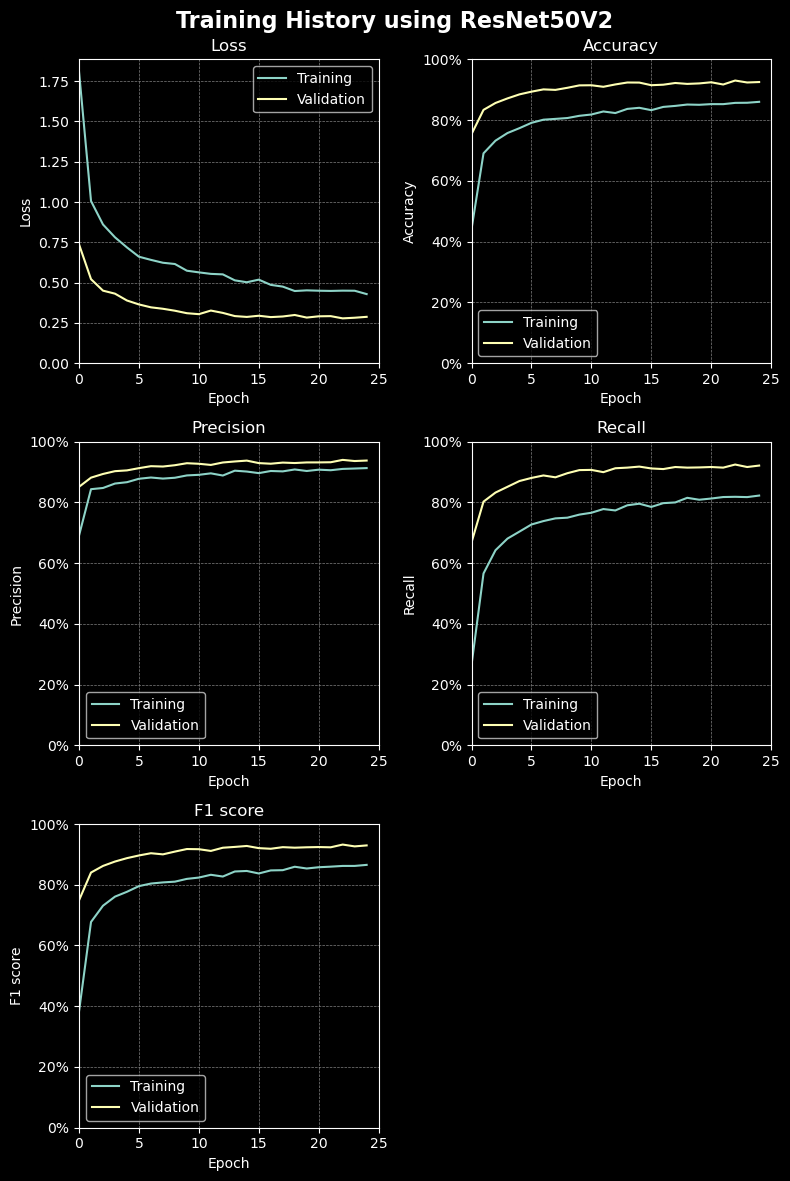

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def training_subplot(hist, metric: str, plotnum: int, lim=None, test_val=None):
    sp = plt.subplot(3, 2, plotnum)
    metric_nm = metric.replace('_', ' ').capitalize()
    plt.plot(hist.history[metric], label='Training')
    plt.plot(hist.history['val_' + metric], label='Validation')

    if test_val is not None:
        test_lbl = 'Test ' + (f'({test_val:.1%})' if lim == 1 else f'({test_val:.2f})')
        plt.axhline(y=test_val, label=test_lbl, color='green', linestyle='-')

    plt.xlabel('Epoch')
    plt.ylabel(metric_nm)
    plt.ylim(0, lim)
    plt.xlim(0, len(hist.history['loss']))
    
    if lim == 1:
        sp.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

    plt.legend()
    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey')
    plt.title(metric_nm)

def plot_training_history(hist, ptm_name, title='Training History'):
    # Assuming that you might have test values (quality scores) elsewhere in your project
    # We'll set `None` for now. If you have test values, replace `None` with those values.
    quality = {
        'loss': None,         # Replace with actual test loss if available
        'accuracy': None,     # Replace with actual test accuracy if available
        'precision': None,    # Replace with actual test precision if available
        'recall': None,       # Replace with actual test recall if available
        'f1_score': None      # Replace with actual test F1 score if available
    }

    # Create the main figure and subplots
    plt.figure(figsize=(8, 12))
    plt.suptitle(f'{title} using {ptm_name}', fontsize=16, fontweight='bold')

    # Plot loss
    training_subplot(hist, 'loss', 1, test_val=quality['loss'])

    # Plot accuracy
    training_subplot(hist, 'accuracy', 2, lim=1, test_val=quality['accuracy'])

    # Plot precision (check if precision exists in history)
    if 'precision' in hist.history:
        training_subplot(hist, 'precision', 3, lim=1, test_val=quality['precision'])

    # Plot recall (check if recall exists in history)
    if 'recall' in hist.history:
        training_subplot(hist, 'recall', 4, lim=1, test_val=quality['recall'])

    # Plot F1 score (check if F1 score exists in history)
    if 'f1_score' in hist.history:
        training_subplot(hist, 'f1_score', 5, lim=1, test_val=quality['f1_score'])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Example call after training:
plot_training_history(history, 'ResNet50V2')


**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.1. <a id='toc1_4_2_1_1_'></a>[**Test Trained Model**](#toc0_) [&#8593;](#toc0_)



Testing model on new images:

['purdue-memorial-union-stained-glass-2.jpg', 'test-image-6.jpg', 'test-image-7.jpg', 'test-image-5.jpg', 'test-image-4.jpg', 'test-image-1.jpg', 'test-image-3.jpg', 'test-image-2.jpg', 'test-image-9.jpg', 'test-image-8.jpg', 'purdue-memorial-union-stained-glass.jpg', 'purdue-bell-tower.jpg', 'test-image-10.jpg', 'gargoyle.jpg']
The preprocessing function is: resnet_preprocess
The compiled model is: <Functional name=functional_2, built=True>
The class names are: ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/purdue-memorial-union-stained-glass-2.jpg
Predicted class: stained_glass
Confidence: 1.00



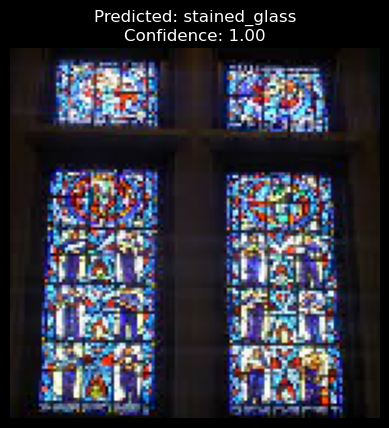

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-6.jpg
Predicted class: stained_glass
Confidence: 0.36



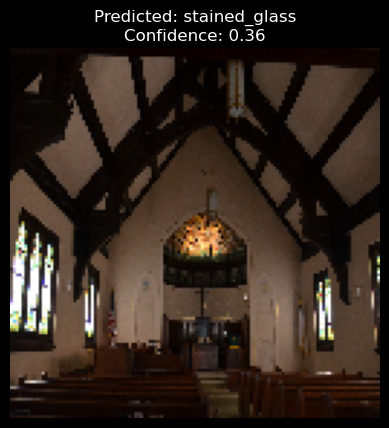

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-7.jpg
Predicted class: column
Confidence: 0.86



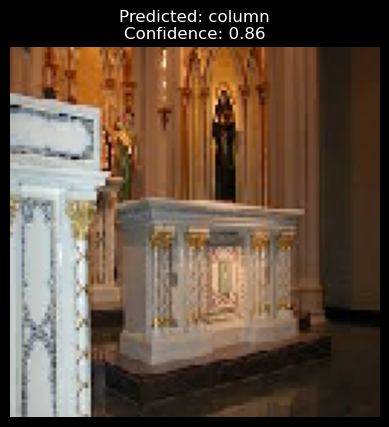

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-5.jpg
Predicted class: dome(inner)
Confidence: 0.68



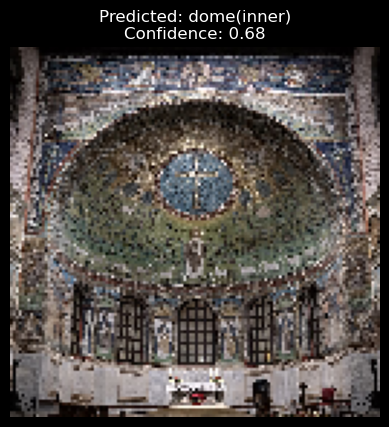

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-4.jpg
Predicted class: flying_buttress
Confidence: 0.98



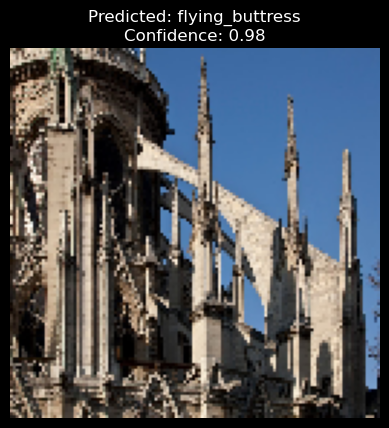

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-1.jpg
Predicted class: bell_tower
Confidence: 1.00



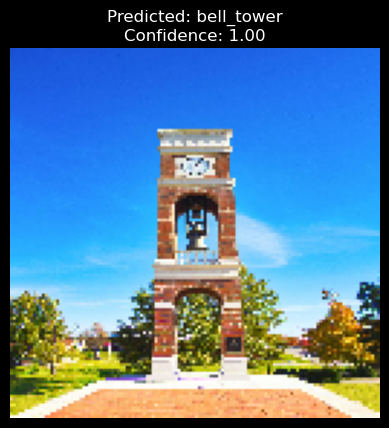

DEBUG:tag: Make (271) - type: string (2) Tag Location: 22 - Data Location: 158 - value: b'Canon\x00'
DEBUG:tag: Model (272) - type: string (2) Tag Location: 34 - Data Location: 164 - value: b'Canon EOS REBEL T3i\x00'
DEBUG:tag: Orientation (274) - type: short (3) - value: b'\x01\x00'
DEBUG:tag: XResolution (282) - type: rational (5) Tag Location: 58 - Data Location: 184 - value: b'H\x00\x00\x00\x01\x00\x00\x00'
DEBUG:tag: YResolution (283) - type: rational (5) Tag Location: 70 - Data Location: 192 - value: b'H\x00\x00\x00\x01\x00\x00\x00'
DEBUG:tag: ResolutionUnit (296) - type: short (3) - value: b'\x02\x00'
DEBUG:tag: Software (305) - type: string (2) Tag Location: 94 - Data Location: 200 - value: b'ACDSee 20\x00'
DEBUG:tag: DateTime (306) - type: string (2) Tag Location: 106 - Data Location: 210 - value: b'2018:09:29 11:12:37\x00'
DEBUG:tag: Artist (315) - type: string (2) - value: b'\x00'
DEBUG:tag: YCbCrPositioning (531) - type: short (3) - value: b'\x02\x00'
DEBUG:tag: Copyright (

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


DEBUG:tag: Make (271) - type: string (2) Tag Location: 22 - Data Location: 158 - value: b'Canon\x00'
DEBUG:tag: Model (272) - type: string (2) Tag Location: 34 - Data Location: 164 - value: b'Canon EOS REBEL T3i\x00'
DEBUG:tag: Orientation (274) - type: short (3) - value: b'\x01\x00'
DEBUG:tag: XResolution (282) - type: rational (5) Tag Location: 58 - Data Location: 184 - value: b'H\x00\x00\x00\x01\x00\x00\x00'
DEBUG:tag: YResolution (283) - type: rational (5) Tag Location: 70 - Data Location: 192 - value: b'H\x00\x00\x00\x01\x00\x00\x00'
DEBUG:tag: ResolutionUnit (296) - type: short (3) - value: b'\x02\x00'
DEBUG:tag: Software (305) - type: string (2) Tag Location: 94 - Data Location: 200 - value: b'ACDSee 20\x00'
DEBUG:tag: DateTime (306) - type: string (2) Tag Location: 106 - Data Location: 210 - value: b'2018:09:29 11:12:37\x00'
DEBUG:tag: Artist (315) - type: string (2) - value: b'\x00'
DEBUG:tag: YCbCrPositioning (531) - type: short (3) - value: b'\x02\x00'
DEBUG:tag: Copyright (


Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-3.jpg
Predicted class: dome(inner)
Confidence: 1.00



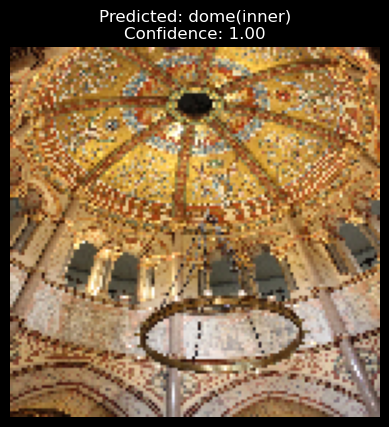

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-2.jpg
Predicted class: dome(outer)
Confidence: 1.00



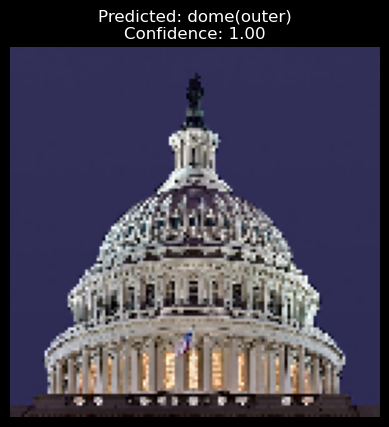

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-9.jpg
Predicted class: gargoyle
Confidence: 0.99



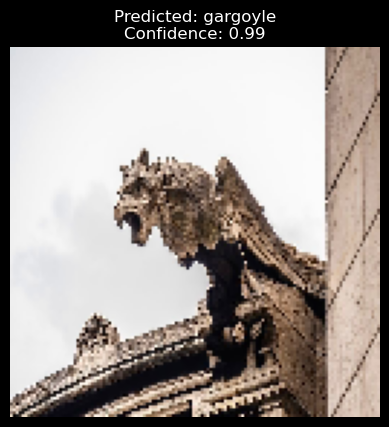

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-8.jpg
Predicted class: column
Confidence: 1.00



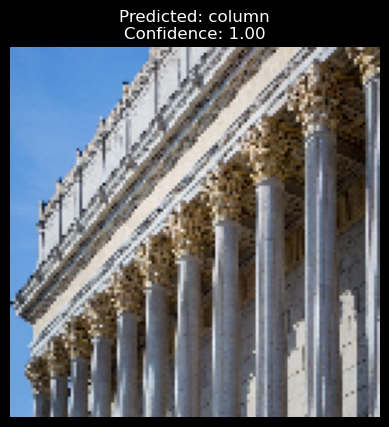

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/purdue-memorial-union-stained-glass.jpg
Predicted class: stained_glass
Confidence: 1.00



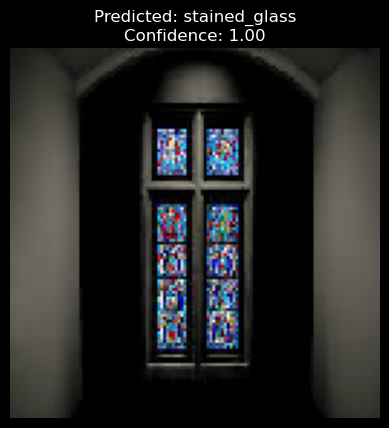

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/purdue-bell-tower.jpg
Predicted class: bell_tower
Confidence: 0.98



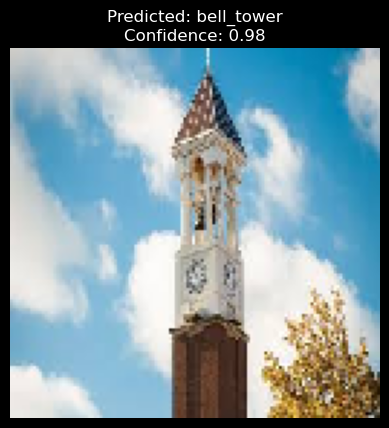

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/test-image-10.jpg
Predicted class: vault
Confidence: 1.00



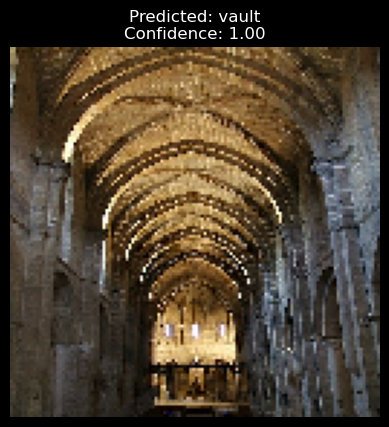

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Image: /Users/toddwalters/Development/data/1703138137_dataset/part_1/dataset_hist_structures/validation_dataset/gargoyle.jpg
Predicted class: gargoyle
Confidence: 1.00



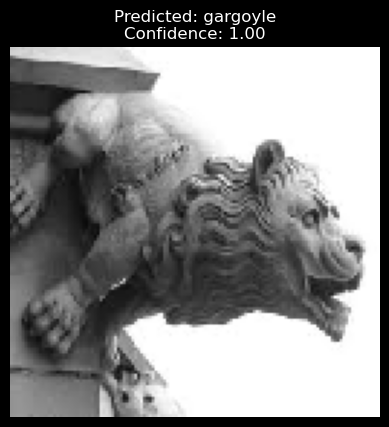

In [61]:
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess

# Create a dictionary mapping string names to preprocessing functions
preprocessing_functions = {
    'efficientnet_preprocess': efficientnet_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess
}

def predict_image_class(model, img_path, class_names, target_size, preprocessing_function_name):
    target_size = target_size  # Get the target size for the chosen architecture
    # Retrieve the actual preprocessing function from the dictionary
    preprocessing_function = preprocessing_functions.get(preprocessing_function_name)
    
    if preprocessing_function is None:
        raise ValueError(f"Unknown preprocessing function: {preprocessing_function_name}")

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocessing_function(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

def visualize_prediction(img_path, target_size, predicted_class, confidence):
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/datasets/1703138137_dataset/part_1/dataset_hist_structures'
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH')

print()
print("\nTesting model on new images:")
print()

# Get the list of all files in the model_test_images directory
test_image_path = f'{DATASET_PATH}/validation_dataset'
image_files = os.listdir(f'{test_image_path}/')

# Optionally, filter the list to include only image files
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
image_files = [file for file in image_files if file.lower().endswith(image_extensions)]

# Print the list of image files
print(image_files)

print(f'The preprocessing function is: {preprocessing_function}')
print(f'The compiled model is: {model}')
print(f'The class names are: {class_names}')

# for img_path in test_image_paths:
for image_file in image_files:
    img_path = f'{test_image_path}/{image_file}'
    predicted_class, confidence = predict_image_class(model, img_path, class_names, target_size, preprocessing_function)
    print()
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    print()

    # Visualize prediction
    visualize_prediction(img_path, target_size, predicted_class, confidence)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.2. <a id='toc1_4_2_1_2_'></a>[**Thing A.B**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.3. <a id='toc1_4_2_1_3_'></a>[**Thing A.C**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.4. <a id='toc1_4_2_1_4_'></a>[**Thing A.D**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### 1.4.3. <a id='toc1_4_3_'></a>[**Part 3**](#toc0_) [&#8593;](#toc0_)

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[**Thing A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.2. <a id='toc1_4_3_2_'></a>[**Thing B**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.1. <a id='toc1_4_3_2_1_'></a>[**Thing B.A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.2. <a id='toc1_4_3_2_2_'></a>[**Thing B.A**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.3. <a id='toc1_4_3_2_3_'></a>[**Thing B.C**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.4. <a id='toc1_4_3_2_4_'></a>[**Thing B.D**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.3. <a id='toc1_4_3_3_'></a>[**Thing C**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.4. <a id='toc1_4_3_4_'></a>[**Thing D**](#toc0_) [&#8593;](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]